In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the Data Set 

df = pd.read_csv("D:\Learnbay DSC Course\Cardio Vascular Disease - Project\data_cardiovascular_risk.csv")


In [3]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [4]:
# Shape of the data set 
df.shape

(3390, 17)

In [5]:
# Information of data 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [6]:
# Check for missing data 

df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [7]:
df.isnull().sum()/len(df) *100

id                 0.000000
age                0.000000
education          2.566372
sex                0.000000
is_smoking         0.000000
cigsPerDay         0.648968
BPMeds             1.297935
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.120944
sysBP              0.000000
diaBP              0.000000
BMI                0.412979
heartRate          0.029499
glucose            8.967552
TenYearCHD         0.000000
dtype: float64

In [8]:
# # Columns with missing values
# education           87
# cigsPerDay          22
# BPMeds              44
# totChol             38
# BMI                 14
# heartRate            1
# glucose            304

In [9]:
df['education'].dtype

#1 - Higher Secorndary, 2- Graduate, 3 - Post Graduate 4- Doctarte or PHD

df['education'].value_counts()

1.0    1391
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

In [10]:
df['education'] = df['education'].fillna(1.0)
df['education'].isnull().sum()

0

In [11]:
print(df['cigsPerDay'].dtype)
print(df['cigsPerDay'].value_counts())

float64
0.0     1703
20.0     606
30.0     176
15.0     172
10.0     106
9.0      104
5.0      103
3.0       79
40.0      62
1.0       48
25.0      44
43.0      42
35.0      17
2.0       17
6.0       14
8.0       10
7.0        8
60.0       8
18.0       7
4.0        7
50.0       6
17.0       5
23.0       5
11.0       4
12.0       3
13.0       3
19.0       2
16.0       2
45.0       2
14.0       1
70.0       1
38.0       1
Name: cigsPerDay, dtype: int64


In [12]:
df['cigsPerDay'] = df['cigsPerDay'].fillna(0.0)
df['cigsPerDay'].isnull().sum()

0

In [13]:
print(df['BPMeds'].dtype)
print(df['BPMeds'].value_counts())

float64
0.0    3246
1.0     100
Name: BPMeds, dtype: int64


In [14]:
df['BPMeds'] = df['BPMeds'].fillna(0.0)
df['BPMeds'].isnull().sum()

0

In [15]:
print(df['totChol'].dtype)
df['totChol'].value_counts()

float64


240.0    65
210.0    51
220.0    48
260.0    46
232.0    45
         ..
137.0     1
113.0     1
392.0     1
353.0     1
364.0     1
Name: totChol, Length: 240, dtype: int64

<AxesSubplot:xlabel='totChol', ylabel='Density'>

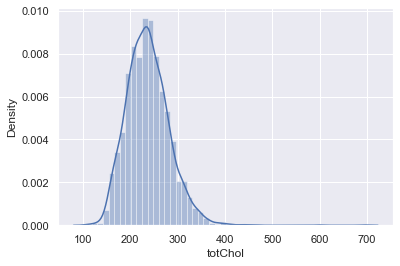

In [16]:
# Since data is continuous , lets check for outlier based on which Missing can be filled 
sns.distplot(df['totChol'])


<AxesSubplot:xlabel='totChol'>

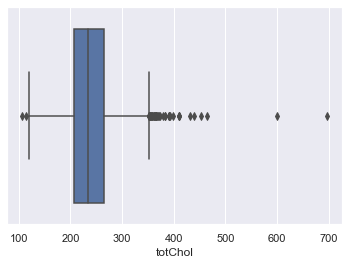

In [17]:
sns.boxplot(df['totChol'])

In [18]:
df['totChol'].median()

234.0

In [19]:
df['totChol'] = df['totChol'].fillna(df['totChol'].median())
df['totChol'].isnull().sum()

0

In [20]:
print(df['BMI'].dtype)
print(df['BMI'].value_counts())

float64
22.91    17
22.54    16
22.19    15
23.48    12
25.09    12
         ..
19.54     1
19.87     1
35.01     1
21.29     1
31.09     1
Name: BMI, Length: 1259, dtype: int64


<AxesSubplot:xlabel='BMI'>

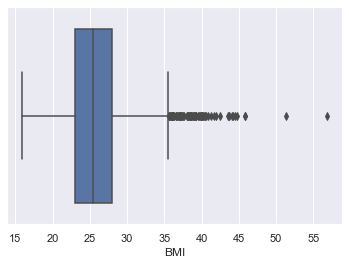

In [21]:
sns.boxplot(df['BMI'])

In [22]:
df['BMI'].median()

25.38

In [23]:
df['BMI'] = df['BMI'].fillna(df['BMI'].median())
df['BMI'].isnull().sum()

0

In [24]:
print(df['heartRate'].dtype)
print(df['heartRate'].value_counts())

float64
75.0     442
80.0     298
70.0     241
85.0     191
72.0     184
        ... 
47.0       1
143.0      1
51.0       1
140.0      1
97.0       1
Name: heartRate, Length: 68, dtype: int64


<AxesSubplot:xlabel='heartRate'>

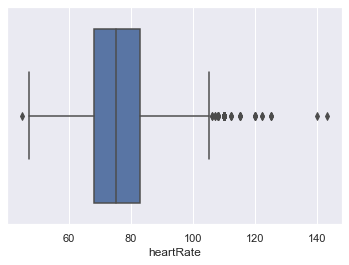

In [25]:
sns.boxplot(df['heartRate'])

In [26]:
df['heartRate'].describe()

count    3389.000000
mean       75.977279
std        11.971868
min        45.000000
25%        68.000000
50%        75.000000
75%        83.000000
max       143.000000
Name: heartRate, dtype: float64

In [27]:
df['heartRate'].median()

75.0

In [28]:
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].median())
df['heartRate'].isnull().sum()

0

In [29]:
print(df['glucose'].dtype)
print(df['glucose'].value_counts())

float64
75.0     149
83.0     135
70.0     123
77.0     122
80.0     118
        ... 
191.0      1
119.0      1
43.0       1
256.0      1
274.0      1
Name: glucose, Length: 132, dtype: int64


<AxesSubplot:xlabel='glucose'>

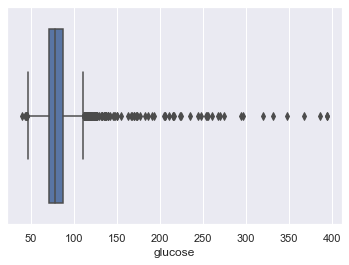

In [30]:
sns.boxplot(df['glucose'])

In [31]:
df['glucose'].median()

78.0

In [32]:
df['glucose'] = df['glucose'].fillna(df['glucose'].median())
df['glucose'].isnull().sum()

0

In [33]:
df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [34]:
for i in df.columns :
    print('___________________________________' , i ,
         '____________________________________________')
    print()
    print(set(df[i].tolist()))

___________________________________ id ____________________________________________

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204,

In [35]:
# Find Duplicates 

duplicates = df[df.duplicated()]
duplicates

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


No duplicates found

In [36]:
def distributions(dataframe , col):
    sns.distplot(dataframe[col])
    plt.show()

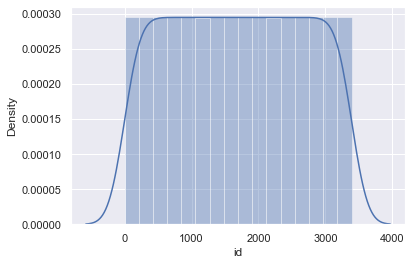

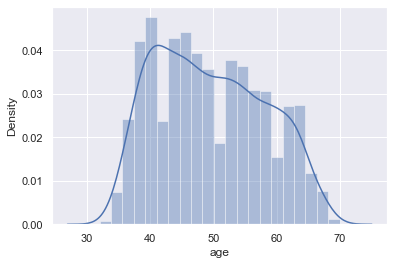

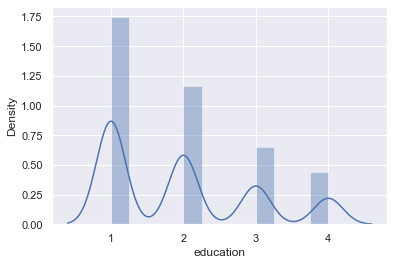

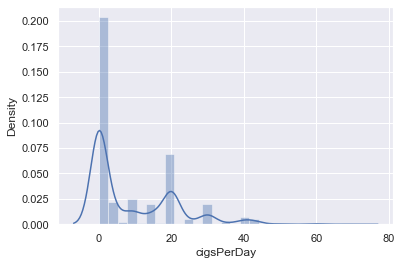

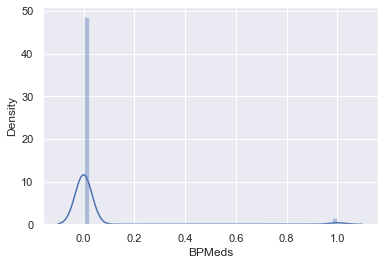

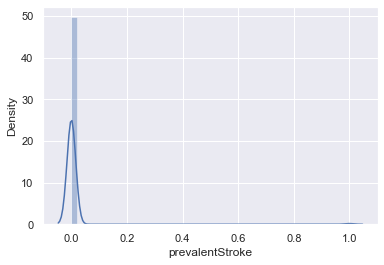

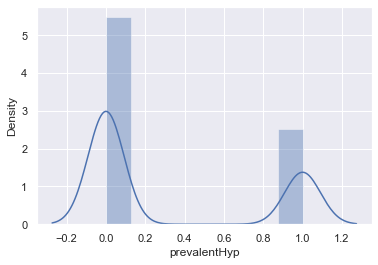

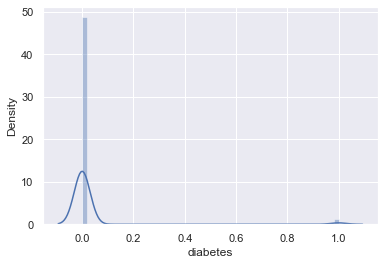

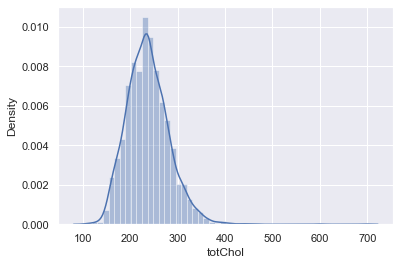

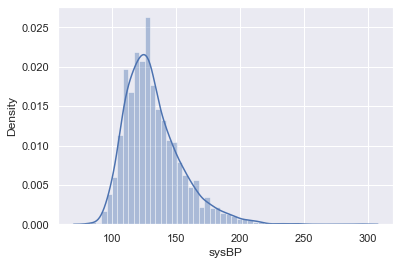

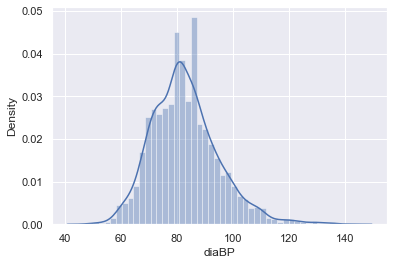

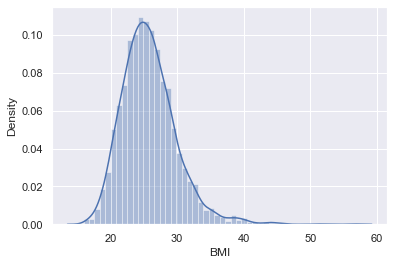

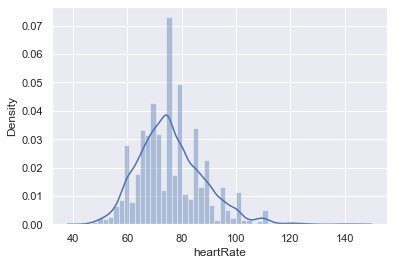

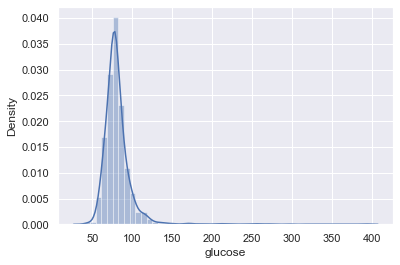

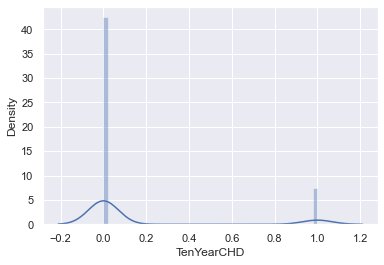

In [37]:
# Check for outliers 

for i in df.select_dtypes(exclude = 'object').columns :
    distributions(df , i)

In [38]:
for i in df.select_dtypes(exclude = 'object').columns :
    print(i , '----->',df[i].skew())

id -----> 0.0
age -----> 0.2257958756715891
education -----> 0.7352403272651097
cigsPerDay -----> 1.232049026922511
BPMeds -----> 5.563972386285764
prevalentStroke -----> 12.297612002671828
prevalentHyp -----> 0.7951885864720627
diabetes -----> 6.001977441386289
totChol -----> 0.9481697283287832
sysBP -----> 1.1758367309612197
diaBP -----> 0.7181726683579213
BMI -----> 1.0255512647527518
heartRate -----> 0.6766595704100932
glucose -----> 6.462107922831296
TenYearCHD -----> 1.953181703698407


In [40]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

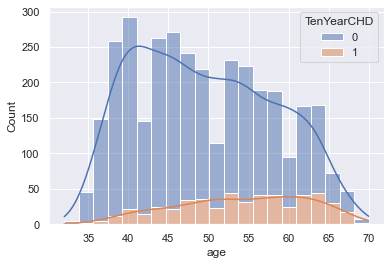

In [42]:
sns.histplot(x = 'age' , hue = 'TenYearCHD', data = df , kde = True , multiple = 'stack')
plt.show()

We can observe that the risk of CHD is found in patients from starting from age group 40-70

In [43]:
df['education'].value_counts()

1.0    1478
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

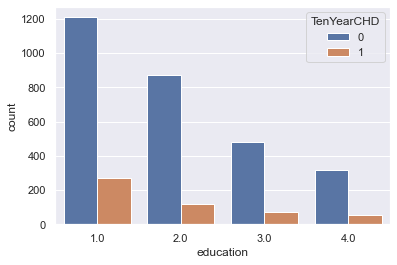

In [46]:
sns.countplot(x = 'education' , hue = 'TenYearCHD' , data = df)
plt.show()

In [49]:
df['sex'].value_counts()

F    1923
M    1467
Name: sex, dtype: int64

In [50]:
df.groupby('sex').size()

sex
F    1923
M    1467
dtype: int64

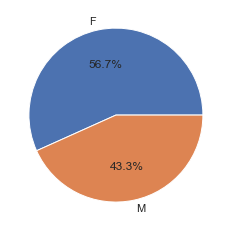

In [55]:
plt.pie(x = df.groupby('sex').size() ,labels =df.groupby('sex').size().index, autopct = '%1.1f%%' , data = df)
plt.show()

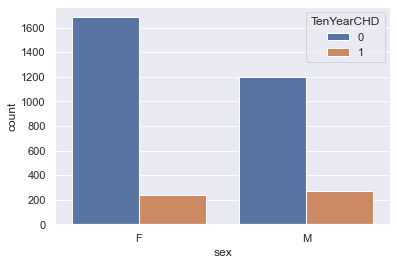

In [56]:
sns.countplot(x = 'sex' , hue = 'TenYearCHD' , data = df)
plt.show()

In [57]:
pd.crosstab(df['sex'] , df['TenYearCHD'])

TenYearCHD,0,1
sex,,
F,1684,239
M,1195,272


* There are more female patients recoded in the data set
* Of the the sample chosen , More male are showing the risk of CHD than women

In [58]:
df['is_smoking'].value_counts()

NO     1703
YES    1687
Name: is_smoking, dtype: int64

In [59]:
pd.crosstab(df['is_smoking'] , df['TenYearCHD'])

TenYearCHD,0,1
is_smoking,,
NO,1467,236
YES,1412,275


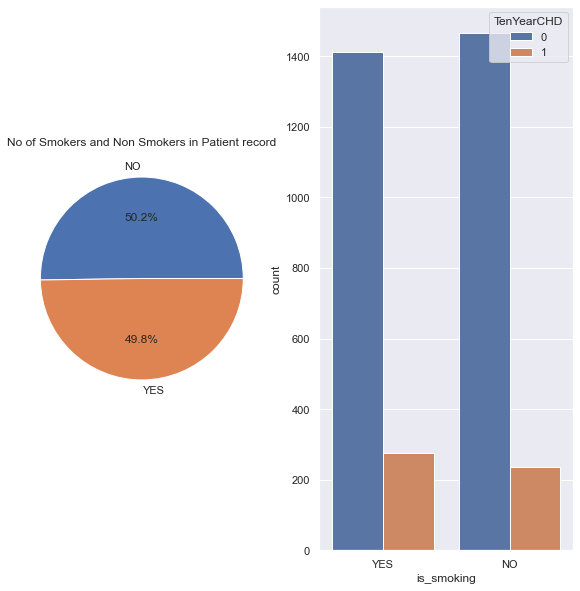

In [62]:
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.pie(x = df.groupby('is_smoking').size() ,labels =df.groupby('is_smoking').size().index, autopct = '%1.1f%%' , data = df)
plt.title('No of Smokers and Non Smokers in Patient record')

plt.subplot(1,2,2)
sns.countplot(x = 'is_smoking' , hue = 'TenYearCHD' , data = df)
plt.show()

The data shows almost equal number of smokers and non smokers , but when compared with reference to CHD risk,
People smoking and with CHD risk are more than people not smoking and with risk of CHD

In [ ]:
# Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
#        'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
#        'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
# #       dtype='object')

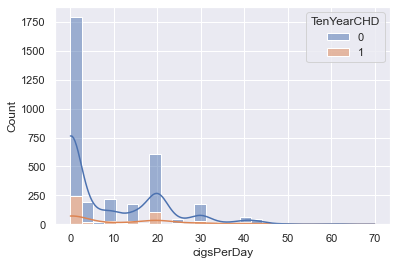

In [63]:
sns.histplot(x = 'cigsPerDay' , hue = 'TenYearCHD', data = df , kde = True , multiple = 'stack')
plt.show()

In [64]:
pd.crosstab(df['BPMeds'] , df['TenYearCHD'])

TenYearCHD,0,1
BPMeds,,
0.0,2812,478
1.0,67,33


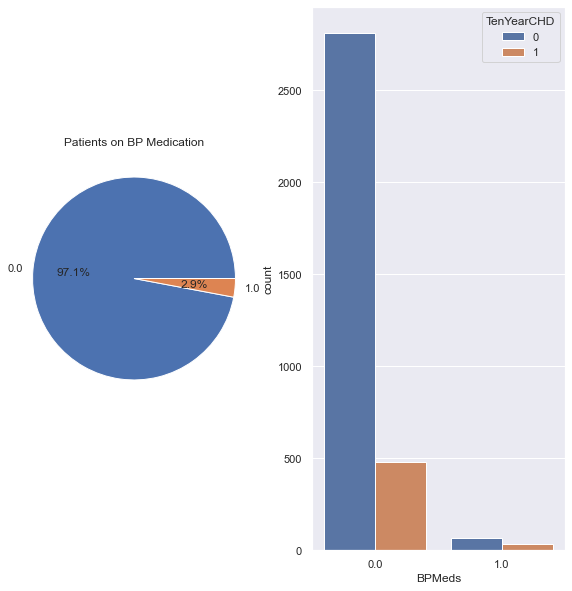

In [65]:
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.pie(x = df.groupby('BPMeds').size() ,labels =df.groupby('BPMeds').size().index, autopct = '%1.1f%%' , data = df)
plt.title('Patients on BP Medication')

plt.subplot(1,2,2)
sns.countplot(x = 'BPMeds' , hue = 'TenYearCHD' , data = df)
plt.show()

* It is evident that most patients are not under any type of BP Medication
* Also We see no such relation which shows people under BP Medication are prone to CHD Risk

In [67]:
pd.crosstab(df['prevalentStroke'] , df['TenYearCHD'])

TenYearCHD,0,1
prevalentStroke,,
0,2867,501
1,12,10


Most patients do not show conditions of prevalent stroke 

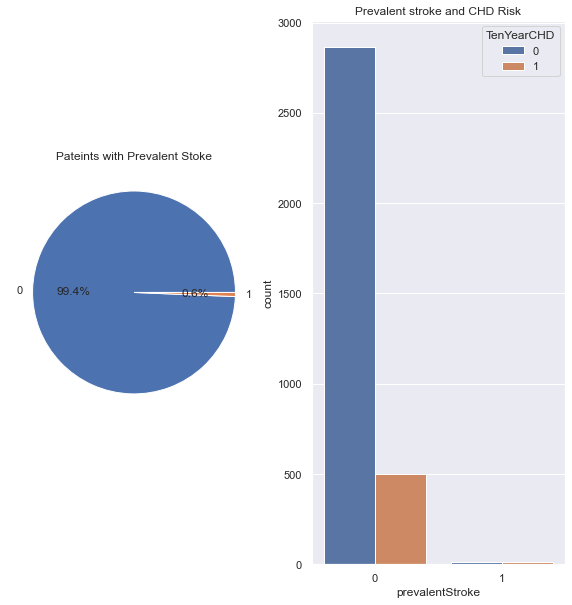

In [68]:
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.pie(x = df.groupby('prevalentStroke').size() ,labels =df.groupby('prevalentStroke').size().index, autopct = '%1.1f%%' , data = df)
plt.title('Pateints with Prevalent Stoke')

plt.subplot(1,2,2)
sns.countplot(x = 'prevalentStroke' , hue = 'TenYearCHD' , data = df)
plt.title('Prevalent stroke and CHD Risk')
plt.show()

In [69]:
df['prevalentStroke'].value_counts()

0    3368
1      22
Name: prevalentStroke, dtype: int64

* It is evident that most patients are not exhibiting prevalent stroke conditions
* Also We see no such relation which shows people with prevalent are prone to CHD Risk

In [70]:
pd.crosstab(df['prevalentHyp'] , df['TenYearCHD'])

TenYearCHD,0,1
prevalentHyp,,
0,2065,256
1,814,255


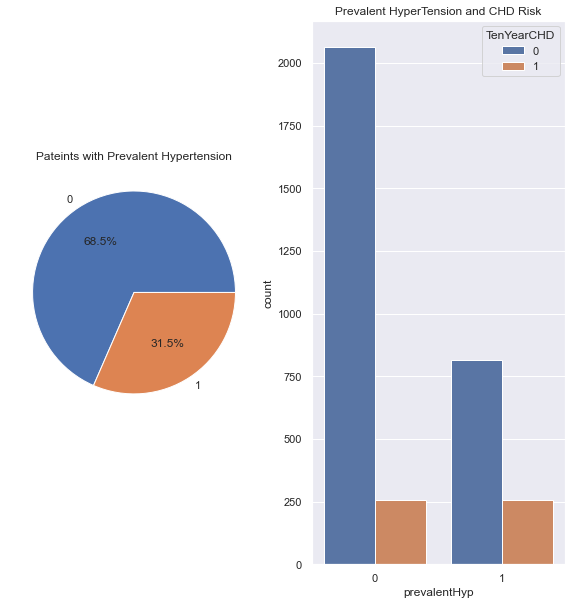

In [73]:
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.pie(x = df.groupby('prevalentHyp').size() ,labels =df.groupby('prevalentHyp').size().index, autopct = '%1.1f%%' , data = df)
plt.title('Pateints with Prevalent Hypertension')

plt.subplot(1,2,2)
sns.countplot(x = 'prevalentHyp' , hue = 'TenYearCHD' , data = df)
plt.title('Prevalent HyperTension and CHD Risk')
plt.show()

* It is obsereved that More patients do not have any condition of prevalent Hypertension
* However when we compare the chances of CHD , almost same amount of patients with / withou Hypertension have CHD risk,

In [72]:
pd.crosstab(df['diabetes'] , df['TenYearCHD'])

TenYearCHD,0,1
diabetes,,
0,2825,478
1,54,33


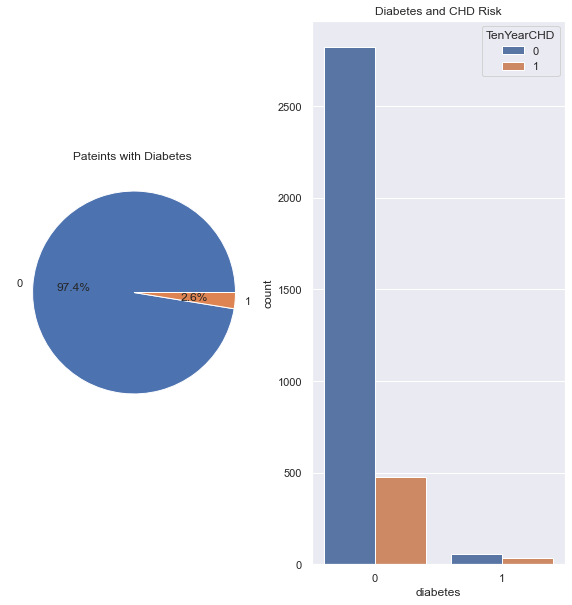

In [75]:
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.pie(x = df.groupby('diabetes').size() ,labels =df.groupby('diabetes').size().index, autopct = '%1.1f%%' , data = df)
plt.title('Pateints with Diabetes ')

plt.subplot(1,2,2)
sns.countplot(x = 'diabetes' , hue = 'TenYearCHD' , data = df)
plt.title('Diabetes and CHD Risk')
plt.show()

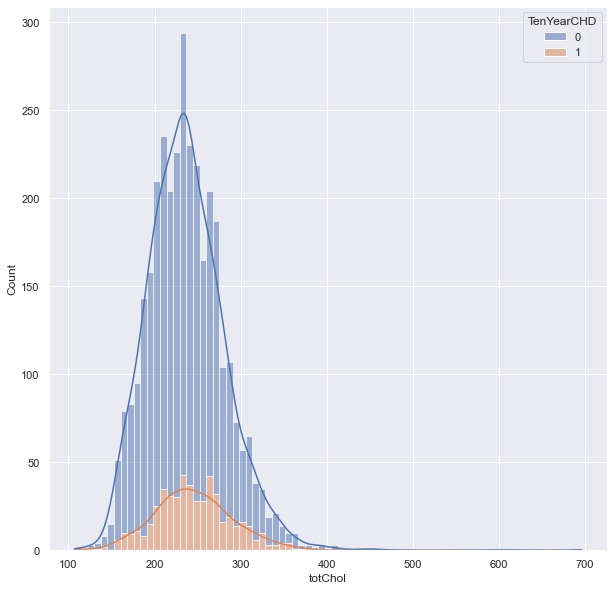

In [77]:
plt.figure(figsize = (10,10))
sns.histplot(x = 'totChol' , hue = 'TenYearCHD', data = df , kde = True , multiple = 'stack')
plt.show()

We can observe that patients with Cholestrol levels around 200-300 have chances of CHD risk

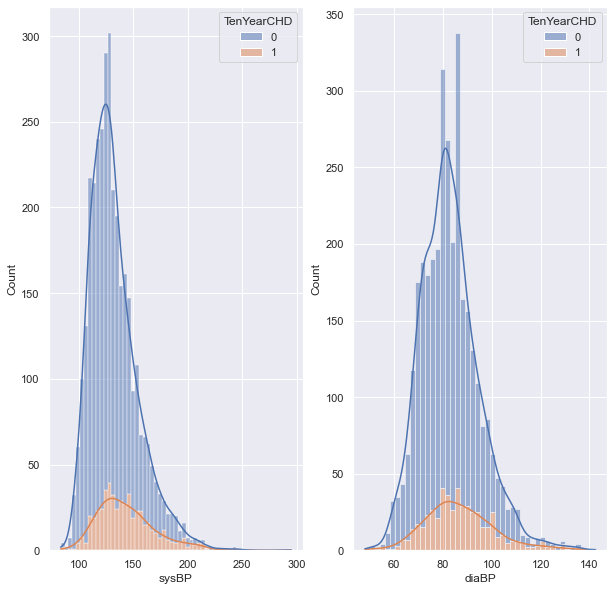

In [79]:
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
sns.histplot(x = 'sysBP' , hue = 'TenYearCHD', data = df , kde = True , multiple = 'stack')

plt.subplot(1,2,2)
sns.histplot(x = 'diaBP' , hue = 'TenYearCHD', data = df , kde = True , multiple = 'stack')

plt.show()

* We can observe patients having sysbp in the range 120 -200 adn diastolic BP 70-100 have chances of CHD Risk
* This also justifies if a person is having High Blood pressure or not becuase the normal level is considered to be 120mm/80mm Hg

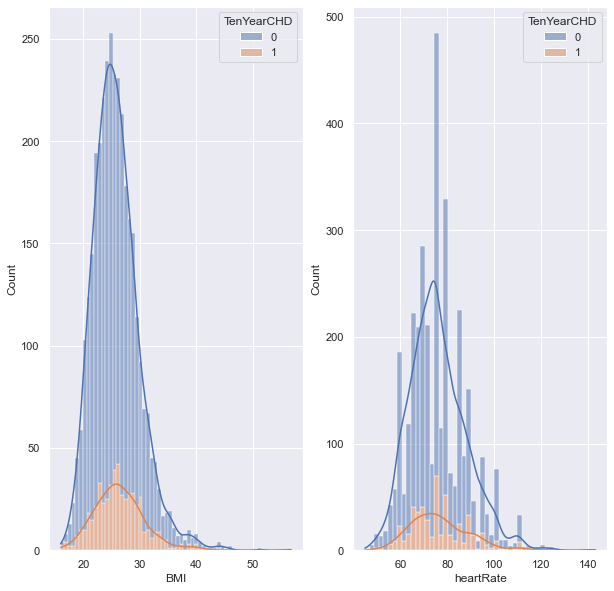

In [80]:
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
sns.histplot(x = 'BMI' , hue = 'TenYearCHD', data = df , kde = True , multiple = 'stack')

plt.subplot(1,2,2)
sns.histplot(x = 'heartRate' , hue = 'TenYearCHD', data = df , kde = True , multiple = 'stack')

plt.show()

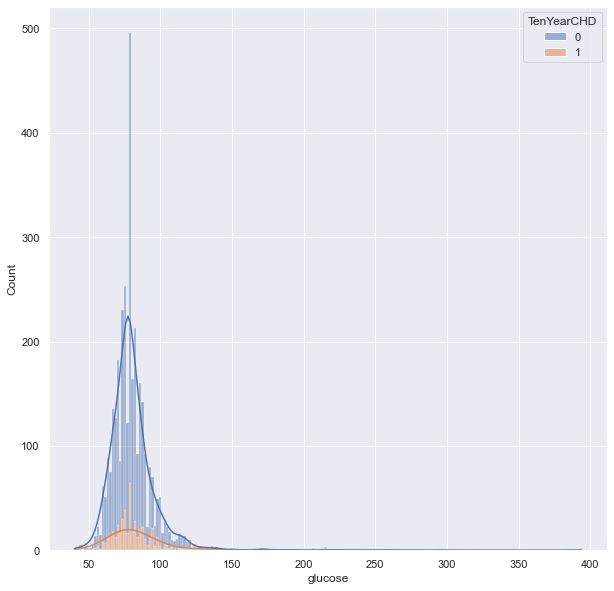

In [82]:
plt.figure(figsize = (10,10))
sns.histplot(x = 'glucose' , hue = 'TenYearCHD', data = df , kde = True , multiple = 'stack')
plt.show()

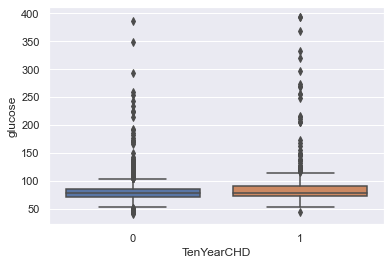

In [83]:
sns.boxplot(x = 'TenYearCHD' , y = 'glucose' , data = df)
plt.show()

# BI VARIATE ANALYSIS 

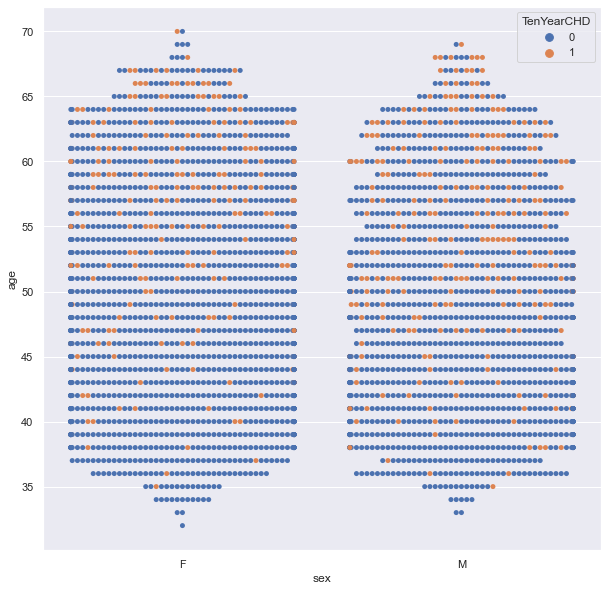

In [88]:
plt.figure(figsize = (10,10))
sns.swarmplot(x = 'sex' ,y = 'age', data = df  , hue = 'TenYearCHD')
plt.show()

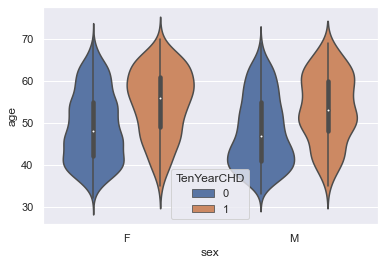

In [89]:
sns.violinplot(x = 'sex' ,y = 'age', data = df  , hue = 'TenYearCHD')
plt.show()

* We can observe that more Female patients aroud the age group 60 have risk of CHD
* Where as Male patients around the age group 45-60 have risk of CHD

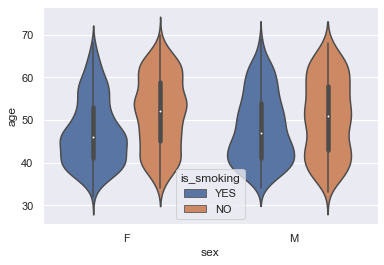

In [91]:
sns.violinplot(x = 'sex' ,y = 'age', data = df  , hue = 'is_smoking')
plt.show()

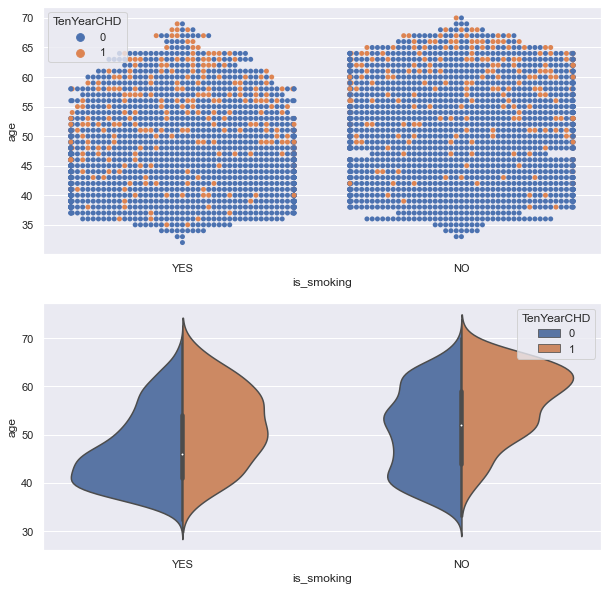

In [96]:
plt.figure(figsize =(10 , 10))
plt.subplot(2,1,1)
sns.swarmplot(x = 'is_smoking' ,y = 'age', data = df  , hue = 'TenYearCHD')

plt.subplot(2,1,2)
sns.violinplot(x = 'is_smoking' ,y = 'age', data = df  , hue = 'TenYearCHD' , split = True)

plt.show()

* Most number of smokers belong to age group 40-60
* Smokers within age group 40 have less CHD Risk where as smokers  belogning to age group 45-60 are prone to CHD Risk 
* Non Smokers from age group around 60 are prone to CHD risk

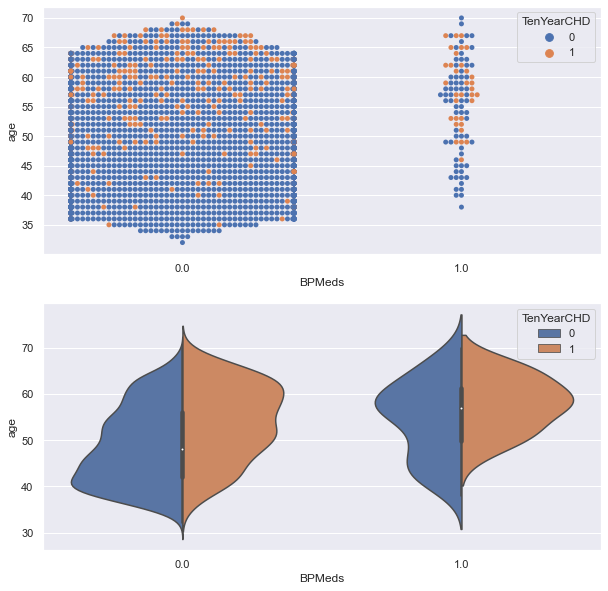

In [97]:
plt.figure(figsize =(10 , 10))
plt.subplot(2,1,1)
sns.swarmplot(x = 'BPMeds' ,y = 'age', data = df  , hue = 'TenYearCHD')

plt.subplot(2,1,2)
sns.violinplot(x = 'BPMeds' ,y = 'age', data = df  , hue = 'TenYearCHD' , split = True)

plt.show()

* Most patients from age group around 55-60 are under BP Medication
* People of age group around 60 under BP Medication have shown risk of CHD

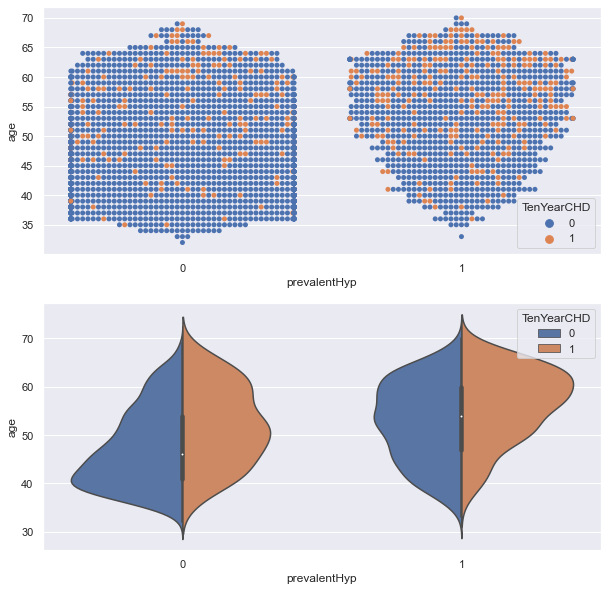

In [98]:
plt.figure(figsize =(10 , 10))
plt.subplot(2,1,1)
sns.swarmplot(x = 'prevalentHyp' ,y = 'age', data = df  , hue = 'TenYearCHD')

plt.subplot(2,1,2)
sns.violinplot(x = 'prevalentHyp' ,y = 'age', data = df  , hue = 'TenYearCHD' , split = True)

plt.show()

We can observe that patients belonging to age group around 55-65 with a prevalent hypertension are prone to risk of CHD

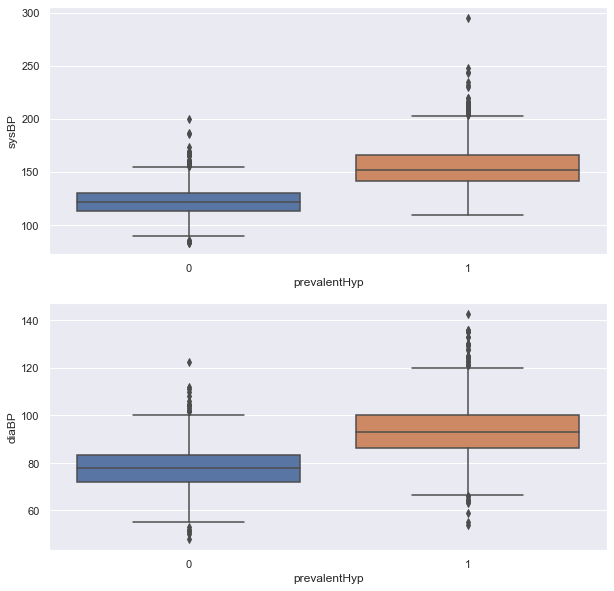

In [100]:
plt.figure(figsize =(10 , 10))
plt.subplot(2,1,1)
sns.boxplot(x = 'prevalentHyp' ,y = 'sysBP', data = df  )

plt.subplot(2,1,2)
sns.boxplot(x = 'prevalentHyp' ,y = 'diaBP', data = df   )

plt.show()

We can observe that prevalent condtions are declared basis BP levels where systolic BP is found more than 130 ,
diastolic BP is more than 70

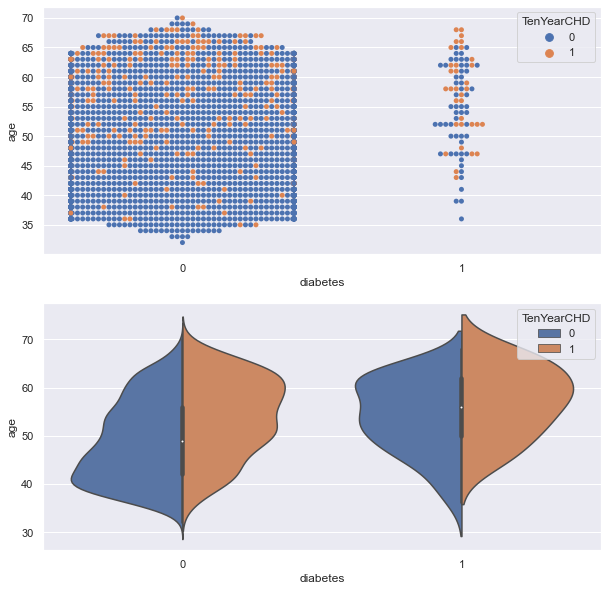

In [101]:
plt.figure(figsize =(10 , 10))
plt.subplot(2,1,1)
sns.swarmplot(x = 'diabetes' ,y = 'age', data = df  , hue = 'TenYearCHD')

plt.subplot(2,1,2)
sns.violinplot(x = 'diabetes' ,y = 'age', data = df  , hue = 'TenYearCHD' , split = True)

plt.show()

* Pateients around age 50-60 are prone to diabetes 
* These Patients with diabetes are prone to CHD Risk 


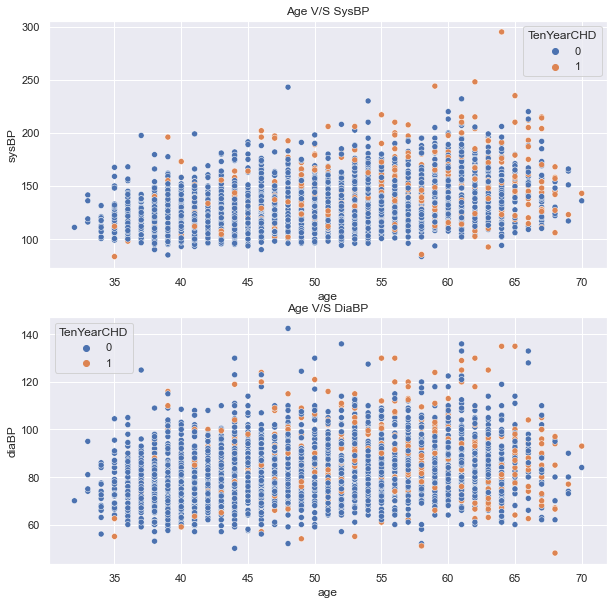

In [106]:
plt.figure(figsize =(10 , 10))
plt.subplot(2,1,1)
sns.scatterplot(x = 'age' ,y = 'sysBP', data = df  , hue = 'TenYearCHD' )
plt.title('Age V/S SysBP')

plt.subplot(2,1,2)
sns.scatterplot(x = 'age' ,y = 'diaBP', data = df ,hue = 'TenYearCHD'  )
plt.title('Age V/S DiaBP')

plt.show()

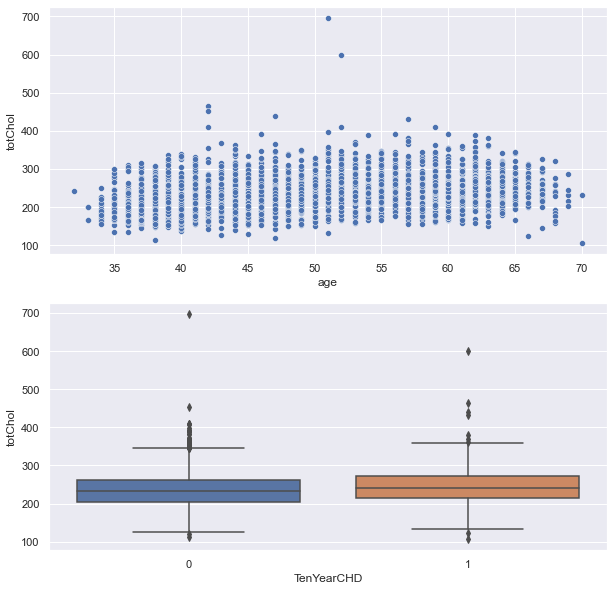

In [109]:
plt.figure(figsize =(10 , 10))
plt.subplot(2,1,1)
sns.scatterplot(x = 'age' ,y = 'totChol', data = df  )

plt.subplot(2,1,2)
sns.boxplot(x = 'TenYearCHD' ,y = 'totChol', data = df   )

plt.show()

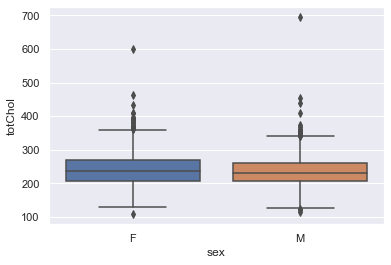

In [313]:
sns.boxplot(x = 'sex' ,y = 'totChol', data = df   )
plt.show()

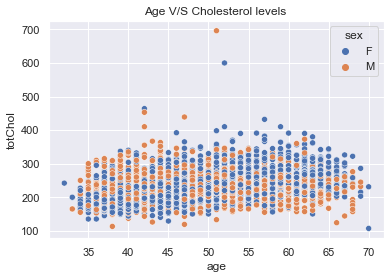

In [319]:
sns.scatterplot(x = 'age' ,y = 'totChol', data = df , hue = 'sex' )
plt.title('Age V/S Cholesterol levels ')
plt.show()

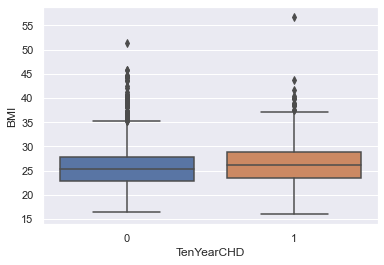

In [110]:
sns.boxplot(x = 'TenYearCHD' , y = 'BMI' , data = df)
plt.show()

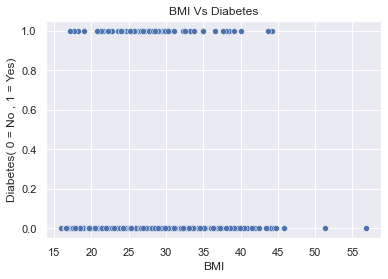

In [112]:
sns.scatterplot(x = 'BMI' , y = 'diabetes' , data = df)
plt.xlabel('BMI')
plt.ylabel('Diabetes( 0 = No , 1 = Yes)')
plt.title('BMI Vs Diabetes')
plt.show()

There is no such linear relationships with BMI and Diabetes , 
But we can see a partial pattern where there are chances of Diabetes with an increased BMI `

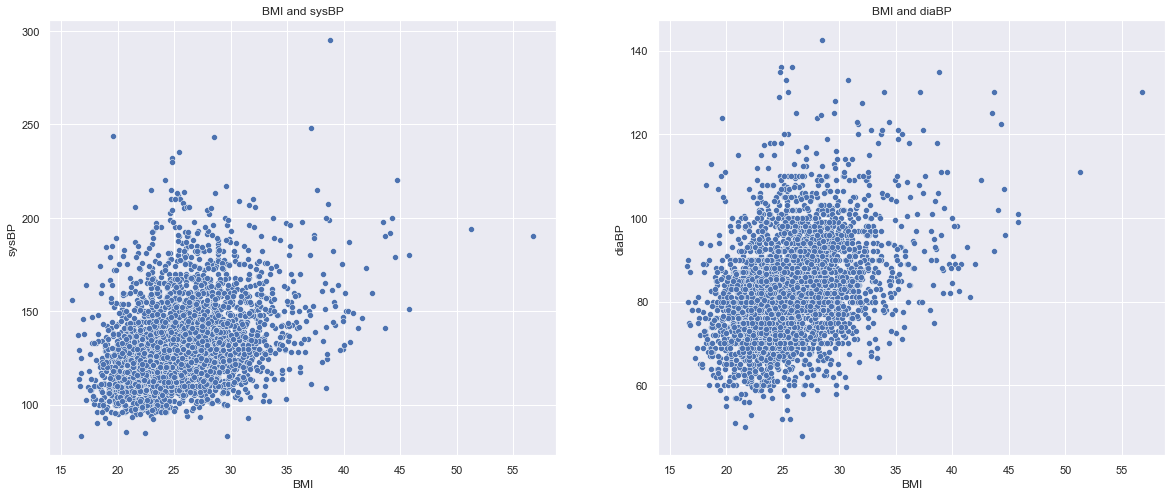

In [334]:
plt.figure(figsize =(20 , 8))
plt.subplot(1,2,1)
sns.scatterplot(x = 'BMI' , y = 'sysBP' , data = df )
plt.title('BMI and sysBP')

plt.subplot(1,2,2)
sns.scatterplot(x = 'BMI' , y = 'diaBP' , data = df )
plt.title('BMI and diaBP')

plt.show()

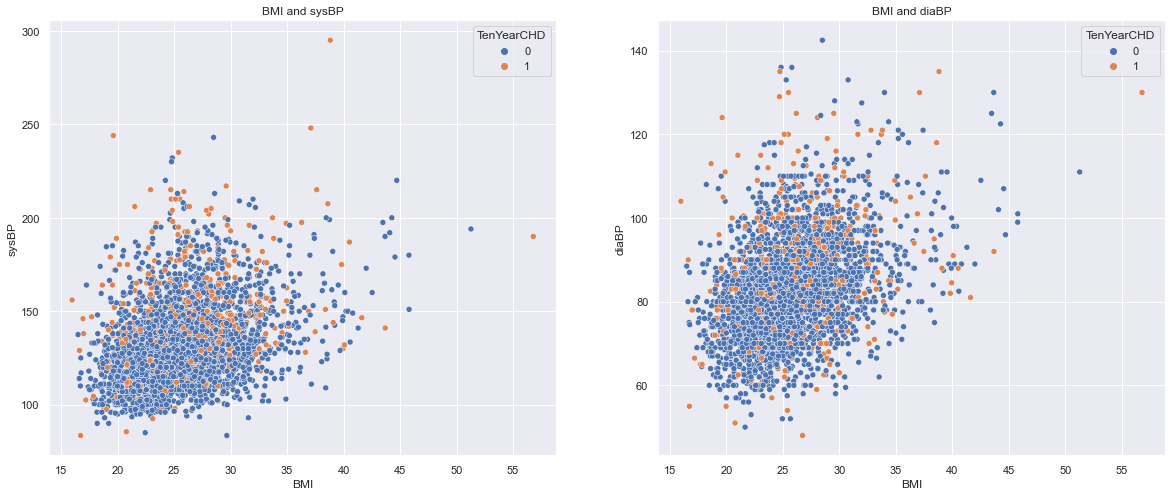

In [335]:
plt.figure(figsize =(20 , 8))
plt.subplot(1,2,1)
sns.scatterplot(x = 'BMI' , y = 'sysBP' , data = df , hue = 'TenYearCHD' )
plt.title('BMI and sysBP')

plt.subplot(1,2,2)
sns.scatterplot(x = 'BMI' , y = 'diaBP' , data = df , hue = 'TenYearCHD')
plt.title('BMI and diaBP')

plt.show()

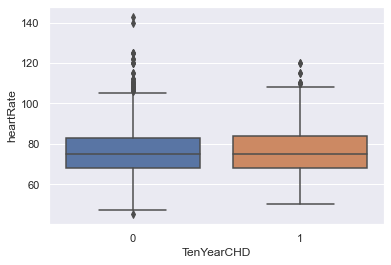

In [113]:
sns.boxplot(x = 'TenYearCHD' , y = 'heartRate' , data = df)
plt.show()

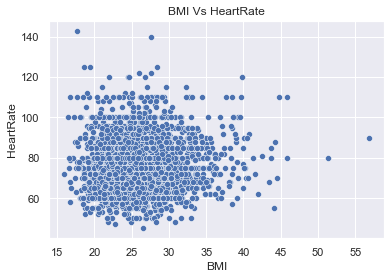

In [114]:
sns.scatterplot(x = 'BMI' , y = 'heartRate' , data = df)
plt.xlabel('BMI')
plt.ylabel('HeartRate')
plt.title('BMI Vs HeartRate')
plt.show()

We can observe that hear rate not necessarily would increase with increased BMI , However there mightbe other factors it might be elevated along with other conditions such as 
BP , Glucose with elevated BMI

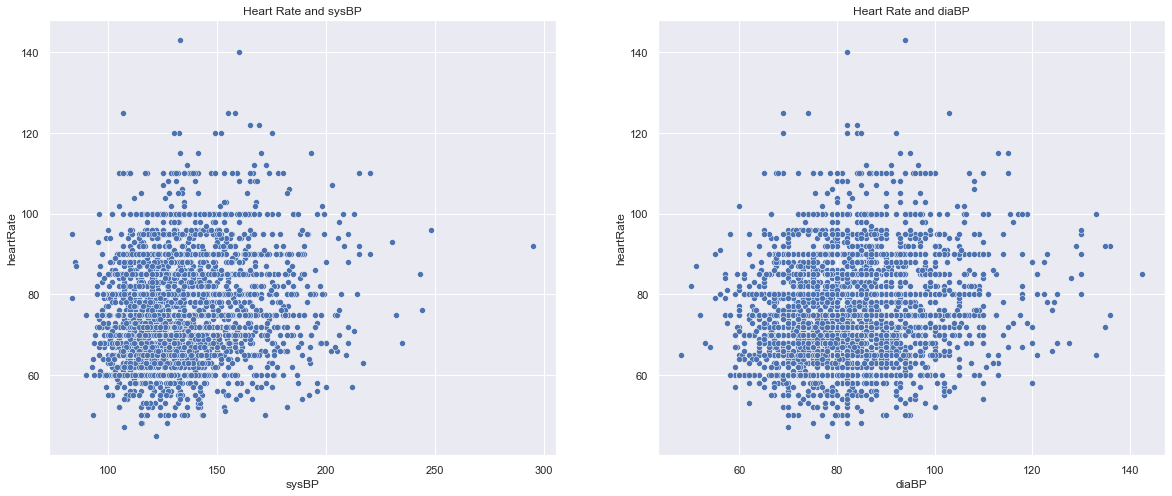

In [337]:
plt.figure(figsize =(20 , 8))
plt.subplot(1,2,1)
sns.scatterplot(x = 'sysBP' , y = 'heartRate' , data = df )
plt.title('Heart Rate and sysBP')

plt.subplot(1,2,2)
sns.scatterplot(x = 'diaBP' , y = 'heartRate' , data = df )
plt.title('Heart Rate and diaBP')

plt.show()

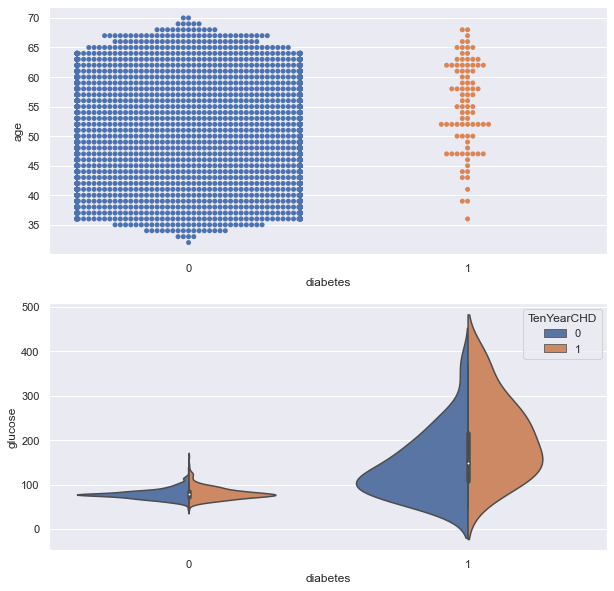

In [115]:
plt.figure(figsize =(10 , 10))
plt.subplot(2,1,1)
sns.swarmplot(x = 'diabetes' ,y = 'age', data = df )

plt.subplot(2,1,2)
sns.violinplot(x = 'diabetes' ,y = 'glucose', data = df  , hue = 'TenYearCHD' , split = True)

plt.show()

* We observe that patient Glucose level more than 120 to 300 are diagnosed with Diabetes 
* These patients are probe to CHD Risk than with lower glucose levels 

In [121]:
a = df.loc[(df['prevalentHyp'] == 1) & (df['diabetes'] == 1)]

In [122]:
a

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
77,77,63,1.0,F,NO,0.0,0.0,0,1,1,150.0,152.0,88.0,36.54,72.0,170.0,0
134,134,64,1.0,F,NO,0.0,0.0,0,1,1,262.0,147.0,90.0,26.51,85.0,173.0,0
173,173,58,1.0,F,NO,0.0,0.0,1,1,1,267.0,157.0,94.0,33.32,92.0,205.0,1
400,400,58,2.0,F,NO,0.0,0.0,0,1,1,240.0,150.0,80.0,26.45,66.0,255.0,1
423,423,52,2.0,F,NO,0.0,0.0,0,1,1,600.0,159.5,94.0,28.27,78.0,140.0,1
475,475,52,3.0,M,NO,0.0,0.0,0,1,1,240.0,146.0,89.0,24.59,64.0,73.0,0
580,580,52,2.0,F,YES,20.0,0.0,0,1,1,334.0,147.0,86.0,29.01,80.0,63.0,0
608,608,65,1.0,F,YES,9.0,0.0,0,1,1,271.0,144.5,88.0,32.41,82.0,116.0,0
781,781,56,1.0,F,YES,10.0,1.0,0,1,1,241.0,174.0,97.0,29.22,90.0,135.0,1
786,786,58,1.0,M,NO,0.0,0.0,0,1,1,287.0,145.0,72.5,26.27,88.0,206.0,1


In [124]:
a['TenYearCHD'].value_counts()

0    25
1    23
Name: TenYearCHD, dtype: int64

In [125]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [127]:
df.loc[:,'totChol':'TenYearCHD']

,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,212.0,168.0,98.0,29.77,72.0,75.0,0
2,250.0,116.0,71.0,20.35,88.0,94.0,0
3,233.0,158.0,88.0,28.26,68.0,94.0,1
4,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...
3385,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,191.0,167.0,105.0,23.01,80.0,85.0,0


<Figure size 1440x1080 with 0 Axes>

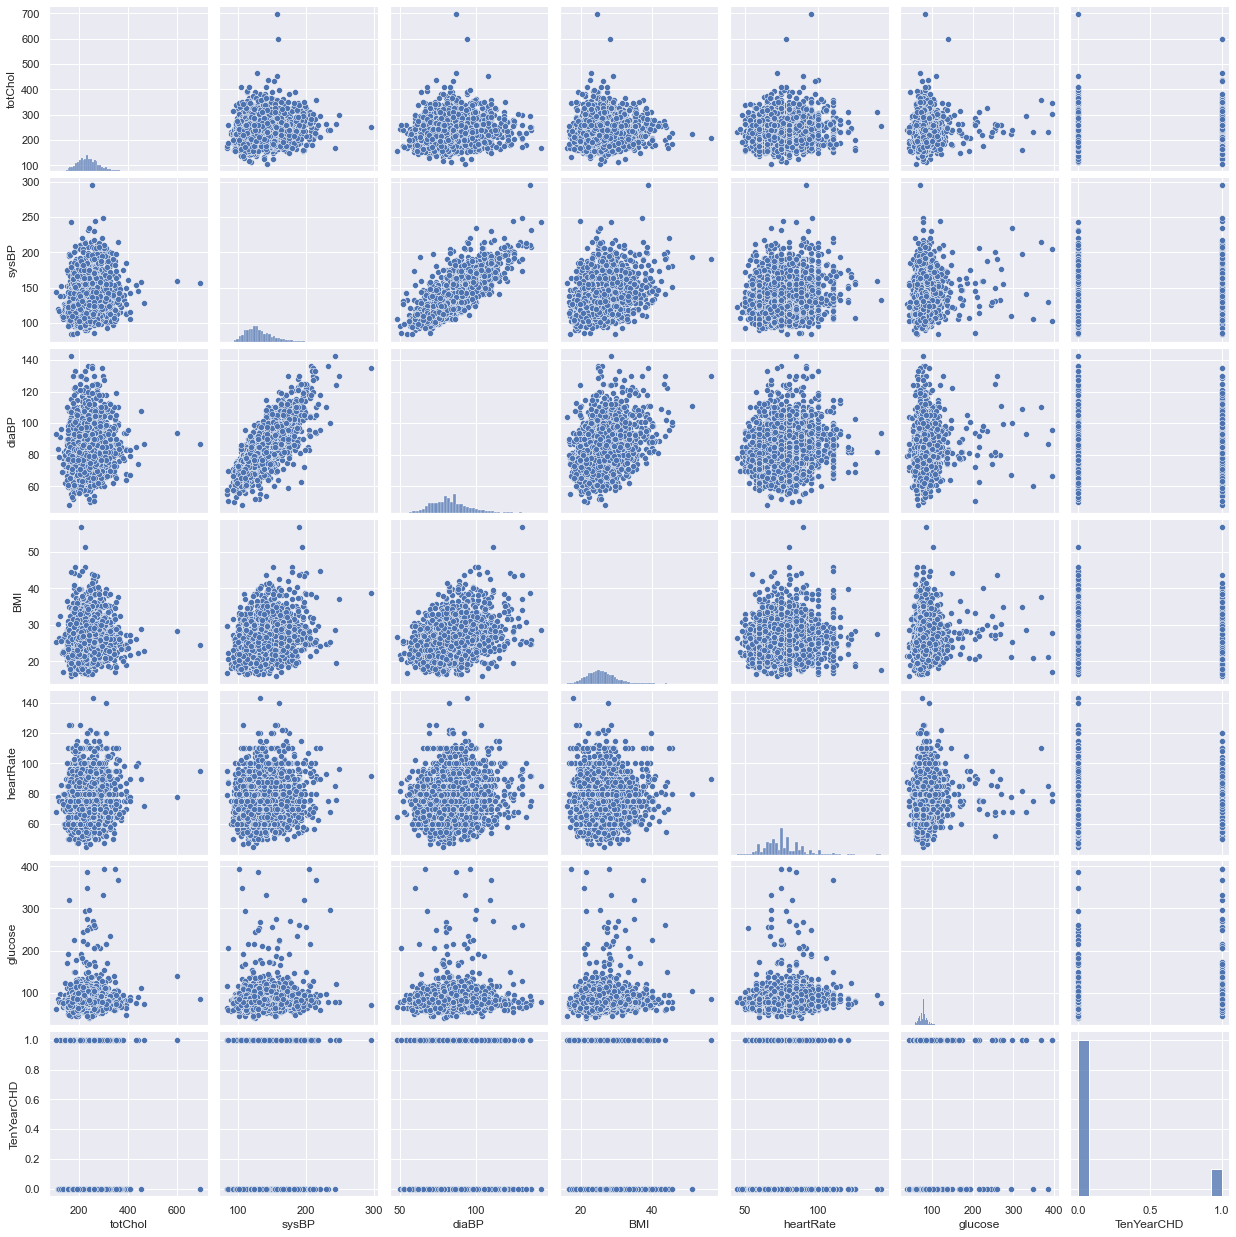

In [128]:
plt.figure(figsize = (20,15))
sns.pairplot(df.loc[:,'totChol':'TenYearCHD'])
plt.show()

In [129]:
df2 = df.copy()

In [132]:
df2.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [131]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3390 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3390 non-null   float64
 6   BPMeds           3390 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3390 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3390 non-null   float64
 14  heartRate        3390 non-null   float64
 15  glucose          3390 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

# Label Encoding

In [133]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [134]:
df2['sex'].value_counts()

F    1923
M    1467
Name: sex, dtype: int64

In [135]:
df2['sex'] = le.fit_transform(df2['sex'])
df2['sex'].value_counts()

0    1923
1    1467
Name: sex, dtype: int64

In [136]:
df2['is_smoking'].value_counts()

NO     1703
YES    1687
Name: is_smoking, dtype: int64

In [137]:
df2['is_smoking'] = le.fit_transform(df2['is_smoking'])
df2['is_smoking'].value_counts()

0    1703
1    1687
Name: is_smoking, dtype: int64

In [138]:
df2.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


Education and ID would not be that significant features to determine whether a patient has CHD risk or not 
hence dropping them 

In [142]:
# df2 = df2.drop(['id' , 'education'],axis = 1)


In [143]:
df2.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [144]:
def boxplots(dataframe , col):
    sns.boxplot(dataframe[col])
    plt.show()

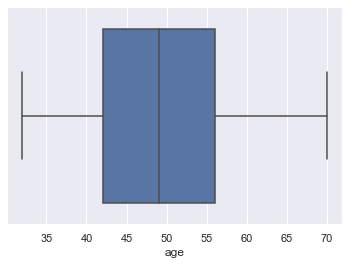

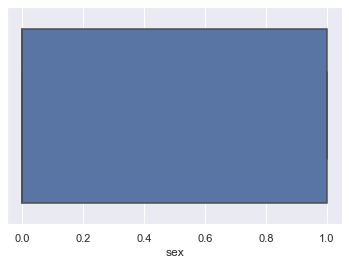

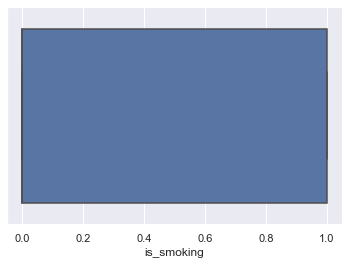

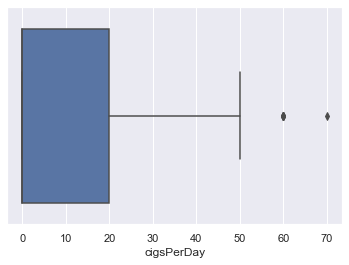

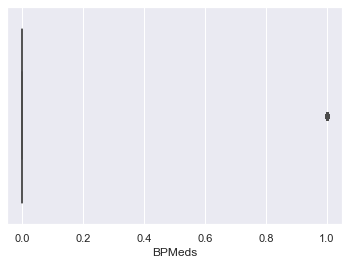

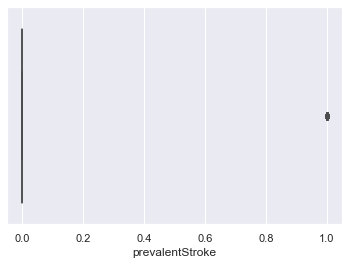

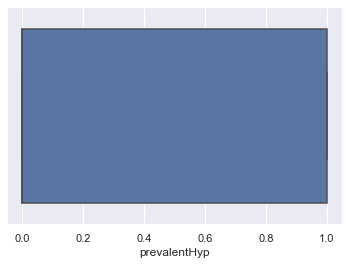

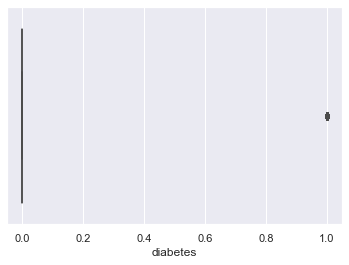

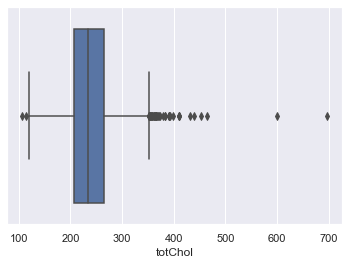

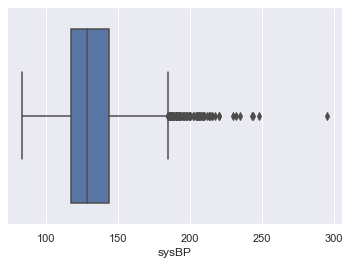

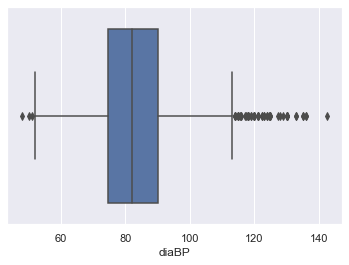

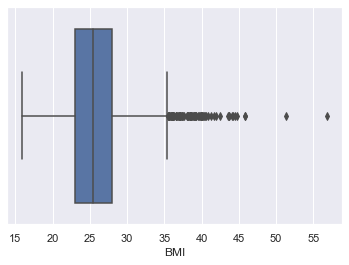

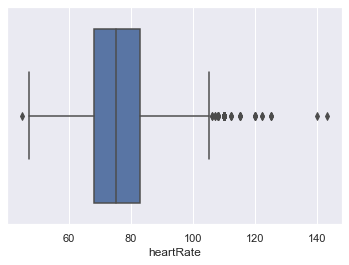

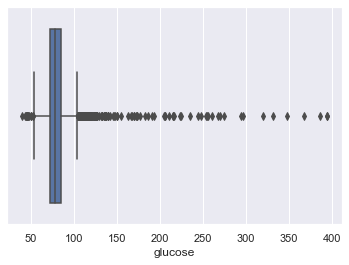

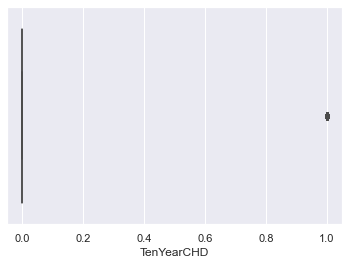

In [145]:
for i in df2.select_dtypes(exclude = 'object').columns :
    boxplots(df2 , i)

'cigsPerDay' , 'totChol' , 'sysBP' , 'diaBP' , 'BMI' , 
'HearRate' , 'Glucose'

In [146]:
df2['totChol'].describe()

count    3390.000000
mean      237.039823
std        44.994205
min       107.000000
25%       206.000000
50%       234.000000
75%       264.000000
max       696.000000
Name: totChol, dtype: float64

In [147]:
df2['totChol'].mean() + 3*df2['totChol'].std()

372.02243843217866

In [148]:
df2['totChol'].mean() - 3*df2['totChol'].std()

102.05720758552047

In [160]:
# z score

(df2[((df2['totChol']-df2['totChol'].mean())/df2['totChol'].std())>3])

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
112,57,0,0,0.0,0.0,0,1,0,382.0,133.0,77.0,24.27,75.0,81.0,0
194,56,0,0,0.0,0.0,0,1,0,391.0,126.0,84.0,24.83,80.0,78.0,0
220,47,1,1,18.0,0.0,0,1,0,439.0,145.0,74.0,22.42,100.0,90.0,1
423,52,0,0,0.0,0.0,0,1,1,600.0,159.5,94.0,28.27,78.0,140.0,1
512,51,1,1,9.0,0.0,0,1,0,696.0,157.0,87.0,24.44,95.0,84.0,0
661,57,0,1,9.0,0.0,0,0,0,382.0,140.0,94.0,21.20,98.0,70.0,0
733,42,0,0,0.0,0.0,0,0,0,464.0,128.0,87.0,22.90,72.0,72.0,1
912,60,0,0,0.0,0.0,0,0,0,391.0,114.0,64.0,24.57,82.0,83.0,0
978,54,0,1,5.0,0.0,0,1,0,390.0,150.0,94.0,27.34,75.0,71.0,0
1740,46,0,1,10.0,0.0,0,0,0,392.0,113.0,68.0,23.35,70.0,63.0,0


In [152]:
df2['totChol'].skew()

0.9481697283287832

In [161]:
df2['cigsPerDay'].skew()

1.232049026922511

In [165]:
for i in ['cigsPerDay' , 'totChol' , 'sysBP' , 'diaBP' , 'BMI' , 'heartRate' , 'glucose']:
    print(i , '------>' , df2[i].skew())

cigsPerDay ------> 1.232049026922511
totChol ------> 0.9481697283287832
sysBP ------> 1.1758367309612197
diaBP ------> 0.7181726683579213
BMI ------> 1.0255512647527518
heartRate ------> 0.6766595704100932
glucose ------> 6.462107922831296


In [ ]:
# Because of the Skewness , Going by IQR approach to cap the outliers 

In [168]:
def capping(DataFrame , col):
    q1 = DataFrame[col].quantile(0.25)
    q3 = DataFrame[col].quantile(0.75)
    iqr = q3-q1
    upper_limit = q3 + 1.5*iqr
    lower_limit = q1 - 1.5*iqr
    print(q1)
    print(q3)
    print(iqr)
    print(upper_limit)
    print(lower_limit)
    DataFrame[col] = np.where(DataFrame[col] > upper_limit , upper_limit ,
                                np.where(DataFrame[col] < lower_limit , lower_limit,
                                        DataFrame[col]))

In [169]:
df2['cigsPerDay'].describe()

count    3390.000000
mean        9.010619
std        11.862839
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64

In [170]:
capping(df2 , 'cigsPerDay')

0.0
20.0
20.0
50.0
-30.0


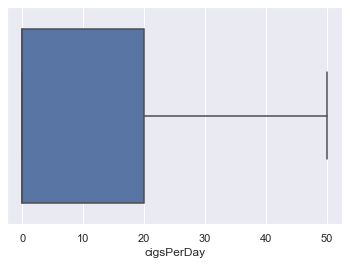

In [171]:
boxplots(df2,'cigsPerDay')

In [172]:
df2['totChol'].describe()

count    3390.000000
mean      237.039823
std        44.994205
min       107.000000
25%       206.000000
50%       234.000000
75%       264.000000
max       696.000000
Name: totChol, dtype: float64

In [173]:
capping(df2 , 'totChol')

206.0
264.0
58.0
351.0
119.0


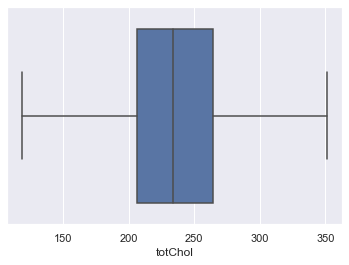

In [174]:
boxplots(df2 , 'totChol')

In [175]:
df2['sysBP'].describe()

count    3390.00000
mean      132.60118
std        22.29203
min        83.50000
25%       117.00000
50%       128.50000
75%       144.00000
max       295.00000
Name: sysBP, dtype: float64

117.0
144.0
27.0
184.5
76.5



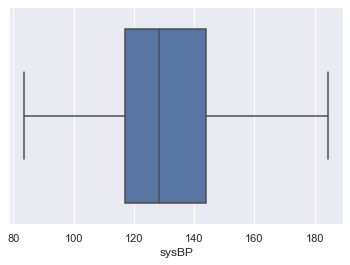

In [176]:
capping(df2 , 'sysBP')

print()

boxplots(df2 , 'sysBP')

74.5
90.0
15.5
113.25
51.25



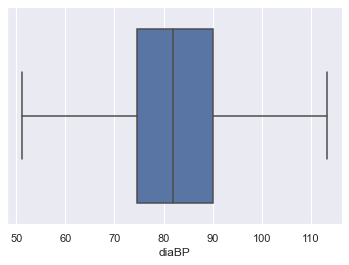

In [177]:
capping(df2 , 'diaBP')

print()

boxplots(df2 , 'diaBP')

23.03
27.9975
4.967499999999998
35.44875
15.578750000000005



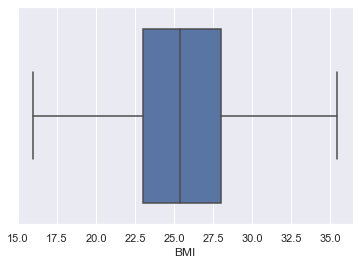

In [178]:
capping(df2 , 'BMI')

print()

boxplots(df2 , 'BMI')

72.0
85.0
13.0
104.5
52.5



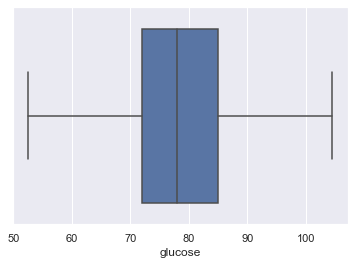

In [179]:
capping(df2 , 'glucose')

print()

boxplots(df2 , 'glucose')

68.0
83.0
15.0
105.5
45.5



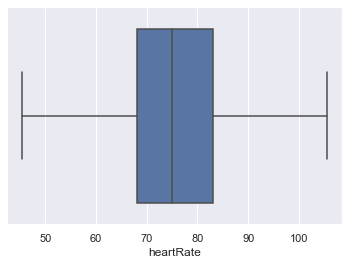

In [180]:
capping(df2 , 'heartRate')

print()

boxplots(df2 , 'heartRate')

In [181]:
df2.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


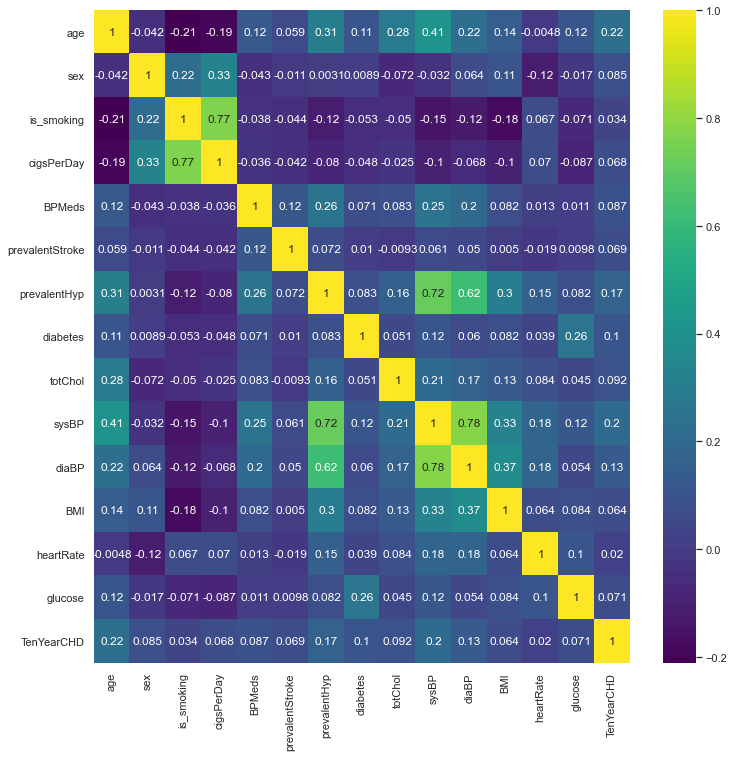

In [182]:
plt.figure(figsize = (12,12))
corr = df2.corr()
sns.heatmap(corr , annot = True , cmap = 'viridis')
plt.show()

* We can see that Systolic BP and diastolic BP are correlated strongly with coeff of 0.78
* Also Number of cigrettes per day with is_smoking is related with a coeff of 0.77
* Hence removing features ' diastolic BP ' and no of cigarettes Per day 

In [338]:
corr

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
age,1.000000,-0.041882,-0.210997,-0.193017,0.122114,0.059038,0.308826,0.107875,0.283016,0.409584,0.221532,0.139434,-0.004846,0.115080,0.224927
sex,-0.041882,1.000000,0.215485,0.329727,-0.043191,-0.011273,0.003072,0.008853,-0.072414,-0.032009,0.064319,0.108946,-0.118898,-0.017005,0.084647
is_smoking,-0.210997,0.215485,1.000000,0.768385,-0.037533,-0.043703,-0.119325,-0.053333,-0.050098,-0.147000,-0.124574,-0.176994,0.066642,-0.071063,0.034143
cigsPerDay,-0.193017,0.329727,0.768385,1.000000,-0.035646,-0.041789,-0.079782,-0.048188,-0.024770,-0.101752,-0.067891,-0.101169,0.069992,-0.087128,0.068355
BPMeds,0.122114,-0.043191,-0.037533,-0.035646,1.000000,0.116183,0.256892,0.070932,0.083160,0.251973,0.197568,0.081777,0.012909,0.011262,0.087349
prevalentStroke,0.059038,-0.011273,-0.043703,-0.041789,0.116183,1.000000,0.071652,0.010115,-0.009336,0.061247,0.050345,0.004963,-0.018935,0.009789,0.068627
prevalentHyp,0.308826,0.003072,-0.119325,-0.079782,0.256892,0.071652,1.000000,0.082565,0.156469,0.717416,0.620058,0.297254,0.148766,0.082088,0.166544
diabetes,0.107875,0.008853,-0.053333,-0.048188,0.070932,0.010115,0.082565,1.000000,0.051222,0.115108,0.059887,0.081565,0.039418,0.260995,0.103681
totChol,0.283016,-0.072414,-0.050098,-0.024770,0.083160,-0.009336,0.156469,0.051222,1.000000,0.205825,0.165002,0.132046,0.083880,0.044937,0.091825
sysBP,0.409584,-0.032009,-0.147000,-0.101752,0.251973,0.061247,0.717416,0.115108,0.205825,1.000000,0.779037,0.326157,0.177070,0.116503,0.203905


In [183]:
df2.shape

(3390, 15)

In [184]:
df2 = df2.drop(['diaBP' , 'cigsPerDay'], axis = 1)
df2.shape

(3390, 13)

We can also see prevalentHyper tension with corelation coefficient of 0.72 with sysBp
We shall check with Anova if it is significant variable 

In [185]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [186]:
model = ols('TenYearCHD ~ prevalentHyp' , data = df2).fit()
anova_result = sm.stats.anova_lm(model , typ = 2)
print(anova_result)

                  sum_sq      df          F        PR(>F)
prevalentHyp   12.037138     1.0  96.654046  1.646912e-22
Residual      421.936018  3388.0        NaN           NaN


In [187]:
model2 = ols('TenYearCHD ~ prevalentStroke' , data = df2).fit()
anova_result2 = sm.stats.anova_lm(model2 , typ = 2)
print(anova_result2)

                     sum_sq      df          F    PR(>F)
prevalentStroke    2.043848     1.0  16.031694  0.000064
Residual         431.929308  3388.0        NaN       NaN


Both are significant variables , hence retaining the variable

# Splitting data into X AND Y 

In [188]:
x = df2.drop(['TenYearCHD'], axis = 1)
y = df2['TenYearCHD']

In [189]:
x.head()

,age,sex,is_smoking,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose
0,64,0,1,0.0,0,0,0,221.0,148.0,25.38,90.0,80.0
1,36,1,0,0.0,0,1,0,212.0,168.0,29.77,72.0,75.0
2,46,0,1,0.0,0,0,0,250.0,116.0,20.35,88.0,94.0
3,50,1,1,0.0,0,1,0,233.0,158.0,28.26,68.0,94.0
4,64,0,1,0.0,0,0,0,241.0,136.5,26.42,70.0,77.0


In [190]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

# Feature scaling for Distance based models

In [191]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [192]:
x1 = sc.fit_transform(x)
x1

array([[ 1.6827831 , -0.87342459,  1.00473095, ..., -0.0853005 ,
         1.22681456,  0.04420669],
       [-1.57621005,  1.14491853, -0.99529132, ...,  1.06676474,
        -0.33274096, -0.38966901],
       [-0.41228392, -0.87342459,  1.00473095, ..., -1.40532059,
         1.05353061,  1.25905864],
       ...,
       [-0.64506915,  1.14491853,  1.00473095, ...,  0.84369972,
        -0.24609898, -0.64999443],
       [ 1.21721265,  1.14491853, -0.99529132, ..., -0.70725828,
         0.36039483,  0.47808238],
       [ 0.51885698, -0.87342459, -0.99529132, ...,  1.09563198,
         0.27375285,  1.08550836]])

# Checking for Imbalance data

0    2879
1     511
Name: TenYearCHD, dtype: int64



<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

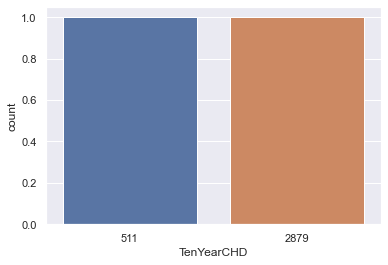

In [193]:
print(y.value_counts())
print()
sns.countplot(y.value_counts())

We have imbalance data because minority class TenYearCHD = 1 i.e 511 * 2 = 1022 is still less than majority class TenYearCHD = 1 which is 2879 Hence imbalance data needs to be handled / balanced

In [194]:
# Using over sampling 
import imblearn

from imblearn.over_sampling import RandomOverSampler
OverSampler = RandomOverSampler()
x_sample1 , y_sample1 = OverSampler.fit_resample(x1 , y )
print(x_sample1.shape , y_sample1.shape , y.shape)

(5758, 12) (5758,) (3390,)


In [195]:
y_sample1.value_counts()

1    2879
0    2879
Name: TenYearCHD, dtype: int64

# Train Test Split

In [196]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x_sample1 , y_sample1 , test_size = 0.25 , random_state = 77 , stratify = y_sample1)
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(4318, 12) (1440, 12) (4318,) (1440,)


# Importing the necessary Models 

In [198]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifer

In [200]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

# Logistic Regression - Scaled Data

In [199]:
logr = LogisticRegression()
logit = logr.fit(x_train , y_train)

In [201]:
y_pred_train_lr = logit.predict(x_train)
y_pred_test_lr = logit.predict(x_test)

In [203]:
training_accuracy_lr = accuracy_score(y_train , y_pred_train_lr)
testing_accuracy_lr = accuracy_score(y_test , y_pred_test_lr)

print('train accuracy :' , training_accuracy_lr)
print('test accuracy :' , testing_accuracy_lr)

train accuracy : 0.6648911533117184
test accuracy : 0.6666666666666666


In [245]:
print('classification report -  LOGIT')
print()
print(classification_report(y_test , y_pred_test_lr))

classification report -  LOGIT

              precision    recall  f1-score   support

           0       0.67      0.66      0.66       720
           1       0.66      0.67      0.67       720

    accuracy                           0.67      1440
   macro avg       0.67      0.67      0.67      1440
weighted avg       0.67      0.67      0.67      1440



In [246]:
from sklearn.metrics import ConfusionMatrixDisplay

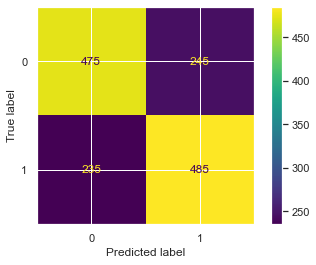

In [247]:
ConfusionMatrixDisplay(confusion_matrix(y_test , y_pred_test_lr)).plot()
plt.show()

# Support Vector Machine

In [204]:
svc = SVC()
svm = svc.fit(x_train , y_train)

In [205]:
y_pred_train_svm = svm.predict(x_train)
y_pred_test_svm = svm.predict(x_test)

In [206]:
training_accuracy_svm = accuracy_score(y_train , y_pred_train_svm)
testing_accuracy_svm = accuracy_score(y_test , y_pred_test_svm)

print('train accuracy :' , training_accuracy_svm)
print('test accuracy :' , testing_accuracy_svm)

train accuracy : 0.7239462714219546
test accuracy : 0.70625


In [248]:
print('classification report -  SVM')
print()
print(classification_report(y_test , y_pred_test_svm))

classification report -  SVM

              precision    recall  f1-score   support

           0       0.69      0.74      0.71       720
           1       0.72      0.68      0.70       720

    accuracy                           0.71      1440
   macro avg       0.71      0.71      0.71      1440
weighted avg       0.71      0.71      0.71      1440



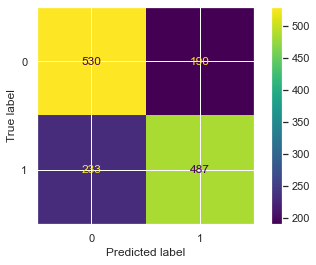

In [249]:
ConfusionMatrixDisplay(confusion_matrix(y_test , y_pred_test_svm)).plot()
plt.show()

# K Nearest Neighbors

In [208]:
from sklearn.neighbors import KNeighborsClassifier

In [209]:
kn = KNeighborsClassifier()
knn = kn.fit(x_train , y_train)

In [210]:
y_pred_train_knn = knn.predict(x_train)
y_pred_test_knn = knn.predict(x_test)

In [211]:
training_accuracy_knn = accuracy_score(y_train , y_pred_train_knn)
testing_accuracy_knn = accuracy_score(y_test , y_pred_test_knn)

print('train accuracy :' , training_accuracy_knn)
print('test accuracy :' , testing_accuracy_knn)

train accuracy : 0.8578045391384901
test accuracy : 0.7881944444444444


In [250]:
print('classification report -  KNN')
print()
print(classification_report(y_test , y_pred_test_knn))

classification report -  KNN

              precision    recall  f1-score   support

           0       0.89      0.66      0.76       720
           1       0.73      0.92      0.81       720

    accuracy                           0.79      1440
   macro avg       0.81      0.79      0.78      1440
weighted avg       0.81      0.79      0.78      1440



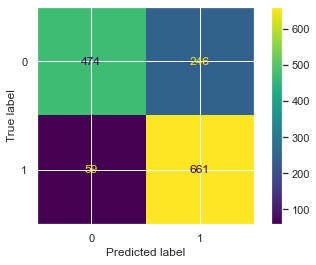

In [251]:
ConfusionMatrixDisplay(confusion_matrix(y_test , y_pred_test_knn)).plot()
plt.show()

In [256]:
error_rate = []

for i in range(1 , 40) :
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train , y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

In [257]:
error_rate

[0.07777777777777778,
 0.09097222222222222,
 0.15138888888888888,
 0.17916666666666667,
 0.21180555555555555,
 0.22013888888888888,
 0.24513888888888888,
 0.27152777777777776,
 0.2833333333333333,
 0.2861111111111111,
 0.2763888888888889,
 0.26944444444444443,
 0.2881944444444444,
 0.28541666666666665,
 0.29097222222222224,
 0.3013888888888889,
 0.30277777777777776,
 0.29791666666666666,
 0.3055555555555556,
 0.31666666666666665,
 0.3194444444444444,
 0.31527777777777777,
 0.32569444444444445,
 0.3236111111111111,
 0.32708333333333334,
 0.32569444444444445,
 0.3138888888888889,
 0.3125,
 0.32430555555555557,
 0.34097222222222223,
 0.33402777777777776,
 0.33541666666666664,
 0.3368055555555556,
 0.3416666666666667,
 0.3451388888888889,
 0.34444444444444444,
 0.34305555555555556,
 0.33402777777777776,
 0.3326388888888889]

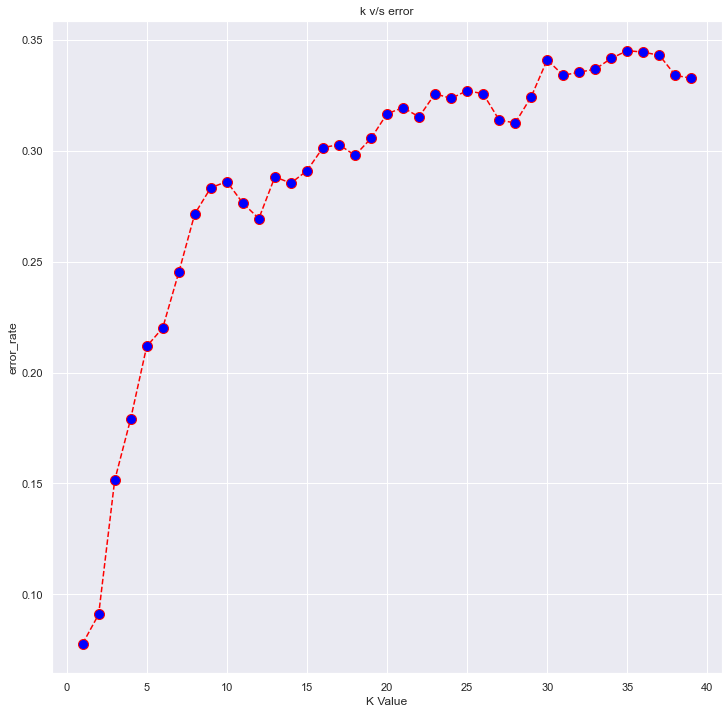

In [258]:
plt.figure(figsize = (12,12))
plt.plot(range(1,40) , error_rate , color = 'red' , linestyle = 'dashed' , marker = 'o' ,
        markerfacecolor = 'blue' , markersize = 10)
plt.xlabel('K Value')
plt.ylabel('error_rate')
plt.title('k v/s error')
plt.show()

In [272]:
kn = KNeighborsClassifier(n_neighbors = 3)
knn = kn.fit(x_train , y_train)

In [273]:
y_pred_train_knn1 = knn.predict(x_train)
y_pred_test_knn1 = knn.predict(x_test)

In [274]:
training_accuracy_knn1 = accuracy_score(y_train , y_pred_train_knn1)
testing_accuracy_knn1 = accuracy_score(y_test , y_pred_test_knn1)

print('train accuracy :' , training_accuracy_knn1)
print('test accuracy :' , testing_accuracy_knn1)

train accuracy : 0.9210282538212136
test accuracy : 0.8486111111111111


When K = 3 
* train accuracy : 0.9210282538212136
* test accuracy : 0.8486111111111111

When K = 5 
* train accuracy : 0.8578045391384901
* test accuracy : 0.7881944444444444


When K = 7 

* train accuracy : 0.817276516905975
* test accuracy : 0.7548611111111111

In [275]:
accuracy_cv_train_knn = cross_val_score(knn , x_train , y_train ,  cv = 10)
accuracy_cv_train_knn.mean()

0.8230708086276532

In [293]:
training_accuracy_cv_knn1  = accuracy_cv_train_knn.mean()
training_accuracy_cv_knn1

0.8230708086276532

In [276]:
print('train accuracy :' , accuracy_cv_train_knn.mean())
print('test accuracy :' , testing_accuracy_knn1)

train accuracy : 0.8230708086276532
test accuracy : 0.8486111111111111


In [277]:
print('classification report -  KNN , n = 3')
print()
print(classification_report(y_test , y_pred_test_knn1))

classification report -  KNN , n = 3

              precision    recall  f1-score   support

           0       0.96      0.72      0.83       720
           1       0.78      0.97      0.87       720

    accuracy                           0.85      1440
   macro avg       0.87      0.85      0.85      1440
weighted avg       0.87      0.85      0.85      1440



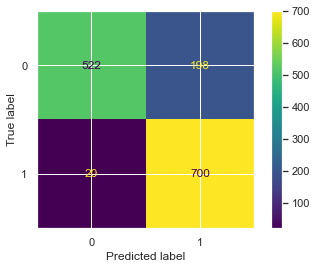

In [278]:
ConfusionMatrixDisplay(confusion_matrix(y_test , y_pred_test_knn1)).plot()
plt.show()

# Decision  Tree

In [212]:
dt = DecisionTreeClassifier()
dtree = dt.fit(x_train , y_train)

In [213]:
y_pred_train_dtree = dtree.predict(x_train)
y_pred_test_dtree = dtree.predict(x_test)

In [214]:
training_accuracy_dtree = accuracy_score(y_train , y_pred_train_dtree)
testing_accuracy_dtree = accuracy_score(y_test , y_pred_test_dtree)

print('train accuracy :' , training_accuracy_dtree)
print('test accuracy :' , testing_accuracy_dtree)

train accuracy : 1.0
test accuracy : 0.8965277777777778


In [279]:
accuracy_cv_train_dtree = cross_val_score(dtree , x_train , y_train ,  cv = 10)
accuracy_cv_train_dtree.mean()

0.894400940964166

In [292]:
training_accuracy_cv_dtree = accuracy_cv_train_dtree.mean()
training_accuracy_cv_dtree

0.894400940964166

In [280]:
print('train accuracy :' , accuracy_cv_train_dtree.mean())
print('test accuracy :' , testing_accuracy_dtree)

train accuracy : 0.894400940964166
test accuracy : 0.8965277777777778


In [252]:
print('classification report -  Decision Tree')
print()
print(classification_report(y_test , y_pred_test_dtree))

classification report -  Decision Tree

              precision    recall  f1-score   support

           0       0.99      0.80      0.89       720
           1       0.83      0.99      0.91       720

    accuracy                           0.90      1440
   macro avg       0.91      0.90      0.90      1440
weighted avg       0.91      0.90      0.90      1440



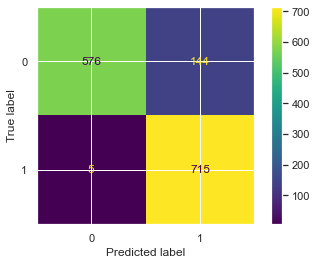

In [253]:
ConfusionMatrixDisplay(confusion_matrix(y_test , y_pred_test_dtree)).plot()
plt.show()

# Random Forest

In [215]:
rforest =  RandomForestClassifier()
rf = rforest.fit(x_train , y_train)

In [216]:
y_pred_train_rf = rf.predict(x_train)
y_pred_test_rf = rf.predict(x_test)

In [217]:
training_accuracy_rf = accuracy_score(y_train , y_pred_train_rf)
testing_accuracy_rf = accuracy_score(y_test , y_pred_test_rf)

print('train accuracy :' , training_accuracy_rf)
print('test accuracy :' , testing_accuracy_rf)

train accuracy : 1.0
test accuracy : 0.9666666666666667


# Cross validationm

In [218]:
from sklearn.model_selection import cross_val_score

In [290]:
accuracy_cv_train = cross_val_score(rf , x_train , y_train ,  cv = 10)
accuracy_cv_train.mean()
training_accuracy_rf_cv = accuracy_cv_train.mean()

In [291]:
print('train accuracy :' , accuracy_cv_train.mean())
print('test accuracy :' , testing_accuracy_rf)

train accuracy : 0.956695776402853
test accuracy : 0.9666666666666667


In [223]:
# Feature Importance

rf.feature_importances_

array([0.16967384, 0.02320559, 0.02668238, 0.00659837, 0.00284119,
       0.0258045 , 0.00847497, 0.15256642, 0.17039101, 0.16185052,
       0.12283809, 0.12907313])

In [224]:
feat_importance = pd.DataFrame(index = x.columns , data = rf.feature_importances_ , columns = ['Feature Importance'])
feat_importance

,Feature Importance
age,0.169674
sex,0.023206
is_smoking,0.026682
BPMeds,0.006598
prevalentStroke,0.002841
prevalentHyp,0.025804
diabetes,0.008475
totChol,0.152566
sysBP,0.170391
BMI,0.161851


In [225]:
sorted_features = feat_importance.sort_values(by= 'Feature Importance' , ascending = False)
sorted_features

,Feature Importance
sysBP,0.170391
age,0.169674
BMI,0.161851
totChol,0.152566
glucose,0.129073
heartRate,0.122838
is_smoking,0.026682
prevalentHyp,0.025804
sex,0.023206
diabetes,0.008475


<Figure size 720x720 with 0 Axes>

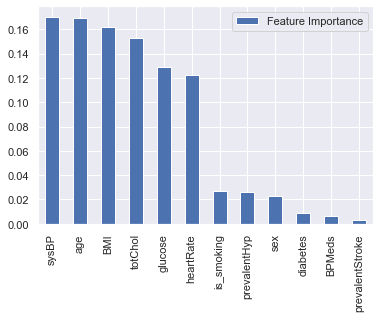

In [229]:
plt.figure(figsize = (10,10))
sorted_features.plot(kind = 'bar')
ax.set_title("Feature importances using MDI")
plt.show()

We can observe that below factors determine whether a Patient has risk for CHD
* Blood pressure
* Age
* BMI
* Cholestrol levels 
* Glucose levels
* Varying Heart Rates

In [230]:
from sklearn.model_selection import GridSearchCV

In [231]:
parameters = {'n_estimators' : [50,100,150] ,
              'criterion' : ['gini' , 'entropy'],
              'max_depth' : [10 , 15 ,20],
             'min_samples_split'  : [2,3,4] ,
              'min_samples_leaf'  : [20 , 25 , 30],
              'max_leaf_nodes'  : [25 , 50 , 100],
              'max_features' : ['sqrt', 'log2', None],
               'bootstrap' : [True , False]}

grid_cv_rf = GridSearchCV(estimator = rf , param_grid = parameters , cv = 10 , n_jobs = -1 )

In [232]:
grid_cv_rf.fit(x_train , y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [25, 50, 100],
                         'min_samples_leaf': [20, 25, 30],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 100, 150]})

In [233]:
grid_cv_rf.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'sqrt',
 'max_leaf_nodes': 100,
 'min_samples_leaf': 20,
 'min_samples_split': 3,
 'n_estimators': 150}

In [234]:
rforest = RandomForestClassifier(bootstrap = False , criterion = 'entropy',
                                max_depth = 20 , max_features = 'sqrt' ,
                                max_leaf_nodes = 100 , min_samples_leaf = 20 ,
                                min_samples_split = 3 , n_estimators = 150)

In [235]:
rf1 = rforest.fit(x_train , y_train)

In [236]:
y_pred_train_rf1 = rf1.predict(x_train)
y_pred_test_rf1 = rf1.predict(x_test)

In [240]:
training_accuracy_rf_hyp = accuracy_score(y_train , y_pred_train_rf1)
testing_accuracy_rf_hyp = accuracy_score(y_test , y_pred_test_rf1)

print('train accuracy :' , training_accuracy_rf_hyp)
print('test accuracy :' , testing_accuracy_rf_hyp)

train accuracy : 0.8503937007874016
test accuracy : 0.7854166666666667


In [242]:
confusion_matrix(y_test , y_pred_test_rf)

array([[677,  43],
       [  5, 715]], dtype=int64)

In [243]:
confusion_matrix(y_test , y_pred_test_rf1)

array([[542, 178],
       [131, 589]], dtype=int64)

In [254]:
print('classification report -  Random Forest')
print()
print(classification_report(y_test , y_pred_test_dtree))

classification report -  Random Forest

              precision    recall  f1-score   support

           0       0.99      0.80      0.89       720
           1       0.83      0.99      0.91       720

    accuracy                           0.90      1440
   macro avg       0.91      0.90      0.90      1440
weighted avg       0.91      0.90      0.90      1440



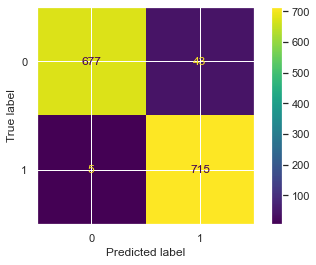

In [255]:
ConfusionMatrixDisplay(confusion_matrix(y_test , y_pred_test_rf)).plot()
plt.show()

In [281]:
from sklearn.metrics import roc_auc_score

In [282]:
from sklearn.metrics import roc_curve

In [283]:
lr_roc_auc = roc_auc_score(y_test , y_pred_test_lr)
svm_roc_auc = roc_auc_score(y_test , y_pred_test_svm)
knn_roc_auc = roc_auc_score(y_test , y_pred_test_knn)
knn1_roc_auc = roc_auc_score(y_test , y_pred_test_knn1)
dtree_roc_auc = roc_auc_score(y_test , y_pred_test_dtree)
rf_roc_auc = roc_auc_score(y_test , y_pred_test_rf)

In [284]:
fpr,tpr,thresholds = roc_curve(y_test , y_pred_test_lr)
display(fpr)
display(tpr)
display(thresholds)

array([0.        , 0.34027778, 1.        ])

array([0.        , 0.67361111, 1.        ])

array([2, 1, 0], dtype=int64)

In [285]:
fprx,tprx,thresholdsx = roc_curve(y_test , y_pred_test_knn)
display(fprx)
display(tprx)
display(thresholdsx)

array([0.        , 0.34166667, 1.        ])

array([0.        , 0.91805556, 1.        ])

array([2, 1, 0], dtype=int64)

In [286]:
fpr,tpr,thresholds = roc_curve(y_test , y_pred_test_lr)
fpr1,tpr1,thresholds = roc_curve(y_test , y_pred_test_svm)
fpr2 , tpr2 , thresholds = roc_curve(y_test , y_pred_test_knn)
fpr3 , tpr3 , thresholds = roc_curve(y_test , y_pred_test_knn1)
fpr4 , tpr4 , thresholds = roc_curve(y_test , y_pred_test_dtree)
fpr5 , tpr5 , thresholds = roc_curve(y_test , y_pred_test_rf)

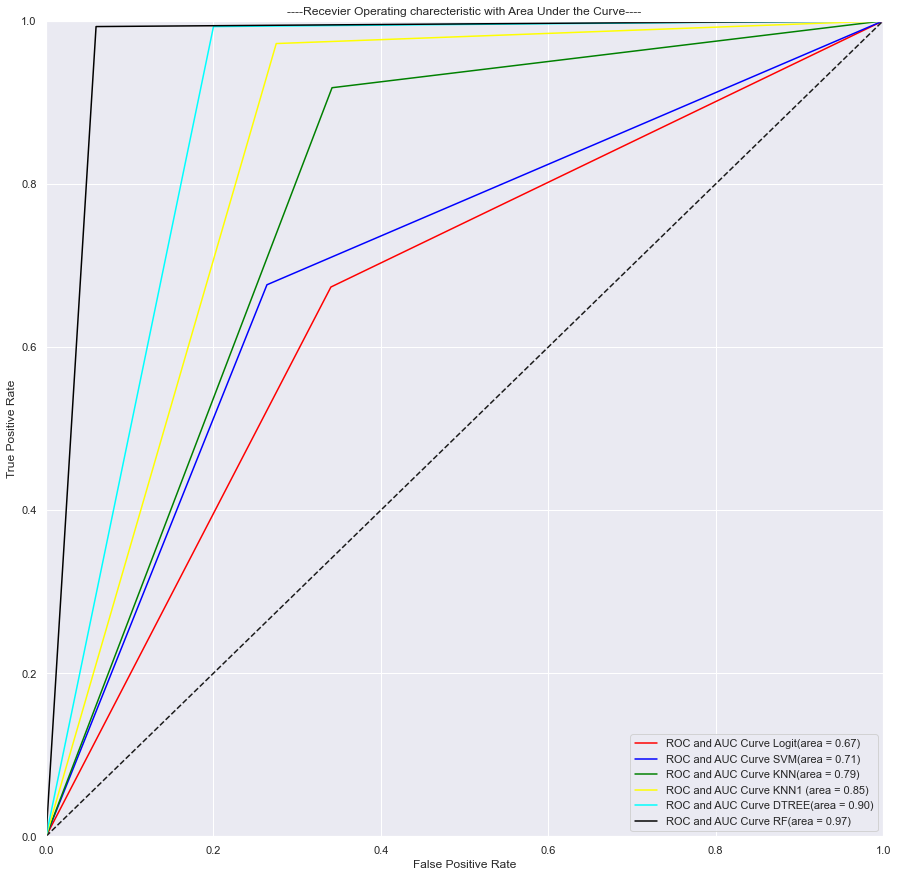

In [289]:
plt.figure(figsize = (15,15))
plt.plot(fpr , tpr , label = 'ROC and AUC Curve Logit(area = %0.2f)' %lr_roc_auc , color = 'red')
plt.plot(fpr1 , tpr1 , label = 'ROC and AUC Curve SVM(area = %0.2f)' %svm_roc_auc , color = 'blue')
plt.plot(fpr2 , tpr2 , label = 'ROC and AUC Curve KNN(area = %0.2f)' %knn_roc_auc , color = 'green')
plt.plot(fpr3 , tpr3 , label = 'ROC and AUC Curve KNN1 (area = %0.2f)' %knn1_roc_auc , color = 'yellow')
plt.plot(fpr4 , tpr4 , label = 'ROC and AUC Curve DTREE(area = %0.2f)' %dtree_roc_auc , color = 'cyan')
plt.plot(fpr5 , tpr5 , label = 'ROC and AUC Curve RF(area = %0.2f)' %rf_roc_auc , color = 'black')
plt.plot([0,1] , [0,1] , 'k--')
plt.xlim([0.0 , 1.0])
plt.ylim([0.0 , 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('----Recevier Operating charecteristic with Area Under the Curve----')
plt.legend(loc = 'lower right')
plt.show()


In [295]:
list1 = ['Logistic Regressio' , 'SVM' , 'KNN' , 'KNN1' , 'DECISION TREE' , 'RANDOM FOREST']

list2 = [training_accuracy_lr , training_accuracy_svm , training_accuracy_knn , training_accuracy_cv_knn1 , training_accuracy_cv_dtree , training_accuracy_rf_cv]

list3 = [testing_accuracy_lr , testing_accuracy_svm , testing_accuracy_knn, testing_accuracy_knn1 , testing_accuracy_dtree , testing_accuracy_rf]

In [296]:
accuracy_df = pd.DataFrame({'ML Models' : list1 , 'Training Accuracy' : list2 ,
                           'Testing Accuracy' : list3})

print(accuracy_df)

            ML Models  Training Accuracy  Testing Accuracy
0  Logistic Regressio           0.664891          0.666667
1                 SVM           0.723946          0.706250
2                 KNN           0.857805          0.788194
3                KNN1           0.823071          0.848611
4       DECISION TREE           0.894401          0.896528
5       RANDOM FOREST           0.956696          0.966667


In [340]:
accuracy_df.to_csv('accuracy_df.csv')

AxesSubplot(0.125,0.125;0.775x0.755)


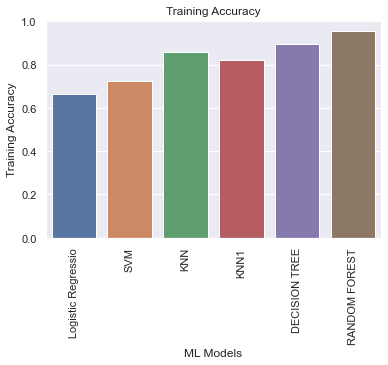

In [298]:
charts = sns.barplot(x = 'ML Models' , y = 'Training Accuracy' , data = accuracy_df)
charts.set_xticklabels(charts.get_xticklabels() , rotation = 90)
plt.title('Training Accuracy')
print(charts)

AxesSubplot(0.125,0.125;0.775x0.755)


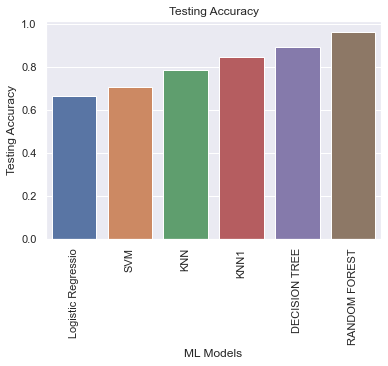

In [299]:
charts = sns.barplot(x = 'ML Models' , y = 'Testing Accuracy' , data = accuracy_df)
charts.set_xticklabels(charts.get_xticklabels() , rotation = 90)
plt.title('Testing Accuracy')
print(charts)

# The Models that are performing good are 

* Random Forest
* Decision Tree 
* Knn with neighbors = 3

# Random Forest Results 

## Accuracy


In [300]:
print('Training Accuracy' , training_accuracy_rf_cv)
print()
print('Testing Accuracy ' ,testing_accuracy_rf )

Training Accuracy 0.956695776402853

Testing Accuracy  0.9666666666666667


In [302]:
print(classification_report(y_test , y_pred_test_rf))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97       720
           1       0.94      0.99      0.97       720

    accuracy                           0.97      1440
   macro avg       0.97      0.97      0.97      1440
weighted avg       0.97      0.97      0.97      1440



In [303]:
print('FPR :',fpr5)
print('TPR :',tpr5)
print('ROC_AUC :', rf_roc_auc)

FPR : [0.         0.05972222 1.        ]
TPR : [0.         0.99305556 1.        ]
ROC_AUC : 0.9666666666666667


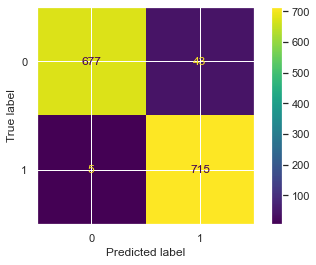

In [304]:
ConfusionMatrixDisplay(confusion_matrix(y_test , y_pred_test_rf)).plot()
plt.show()

In [341]:
pd.crosstab(y_test.values.flatten(), y_pred_test_rf, rownames=['Actual'], colnames=['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,677,43,720
1,5,715,720
All,682,758,1440


# Decision Tree Results

## Accuracy

In [305]:
print('Training Accuracy' , training_accuracy_cv_dtree)
print()
print('Testing Accuracy ' ,testing_accuracy_dtree )

Training Accuracy 0.894400940964166

Testing Accuracy  0.8965277777777778


In [306]:
print(classification_report(y_test , y_pred_test_dtree))

              precision    recall  f1-score   support

           0       0.99      0.80      0.89       720
           1       0.83      0.99      0.91       720

    accuracy                           0.90      1440
   macro avg       0.91      0.90      0.90      1440
weighted avg       0.91      0.90      0.90      1440



In [307]:
print('FPR :',fpr4)
print('TPR :',tpr4)
print('ROC_AUC :', dtree_roc_auc)

FPR : [0.  0.2 1. ]
TPR : [0.         0.99305556 1.        ]
ROC_AUC : 0.8965277777777778


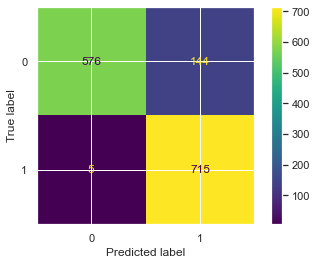

In [308]:
ConfusionMatrixDisplay(confusion_matrix(y_test , y_pred_test_dtree)).plot()
plt.show()

In [342]:
pd.crosstab(y_test.values.flatten(), y_pred_test_dtree, rownames=['Actual'], colnames=['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,576,144,720
1,5,715,720
All,581,859,1440


# K Nearest Neighbors ( k =3)

## Accuracy

In [309]:
print('Training Accuracy' , training_accuracy_cv_knn1)
print()
print('Testing Accuracy ' ,testing_accuracy_knn1 )

Training Accuracy 0.8230708086276532

Testing Accuracy  0.8486111111111111


In [310]:
print(classification_report(y_test , y_pred_test_knn1))

              precision    recall  f1-score   support

           0       0.96      0.72      0.83       720
           1       0.78      0.97      0.87       720

    accuracy                           0.85      1440
   macro avg       0.87      0.85      0.85      1440
weighted avg       0.87      0.85      0.85      1440



In [311]:
print('FPR :',fpr3)
print('TPR :',tpr3)
print('ROC_AUC :', knn1_roc_auc)

FPR : [0.    0.275 1.   ]
TPR : [0.         0.97222222 1.        ]
ROC_AUC : 0.8486111111111112


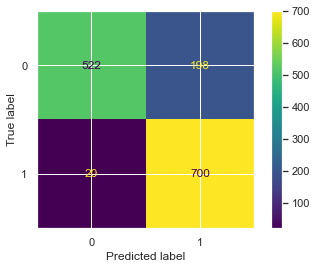

In [312]:
ConfusionMatrixDisplay(confusion_matrix(y_test , y_pred_test_knn1)).plot()
plt.show()

In [343]:
pd.crosstab(y_test.values.flatten(), y_pred_test_knn1, rownames=['Actual'], colnames=['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,522,198,720
1,20,700,720
All,542,898,1440


# Conclusion

Of the three models , Random Forest can be chosen since it is yielding good results when compare to other models in terms of all 
evaluation metrics below

* Accuracy
* F1-Score
* Precision and Recall 
* Area under curve characteristics